## Motivation

 Customer segmentationn helps to cluster customers into groups based on some similar characterists. Customer segmentation is essential for business because of the following reasons:
* It helps to identify valuable customers.
* It helps to target specific group of customers which can be determined from characterists of the cluster.
* It helps to identify useful communication means with the targeted segment.
* It helps in improving quality of service, loyality and retentation ability.
* It helps in improving relationship with customers by better understanding their needs.
* It provides opportunity for upselling and cross-selling.
* It helps in manages to design special offers based on the segments.
* It helps in dealing with competition.
* It helps in identifying products that will interest customers.
 
 


## Dataset Description
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.
Following are the columns present in the dataset:
* **InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* **StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* **Description**: Product (item) name. Nominal.
* **Quantity**: The quantities of each product (item) per transaction. Numeric.
* **InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.
* **UnitPrice**: Unit price. Numeric, Product price per unit in sterling.
* **CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* **Country**: Country name. Nominal, the name of the country where each customer resides.

## Project Overview
In this project, we will perform variety of analysis including RFM analysis, Cohort Analysis and Customer Life Time Value analysis.


# **1. Importing Libraries**

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import calendar
import datetime as dt
from operator import attrgetter
import matplotlib.colors as mcolors
color = sns.color_palette()
import squarify #treemap
import inspect

In [132]:
### Taken from justfortherec's answer: https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{}".format(round(y_value)) 
        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

# **2. Importing and Preprocessing the dataset**


In [133]:
data = pd.read_csv('../input/ecommerce-data/data.csv')

In [134]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [136]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['InvoiceDate'].dtypes #we have changed InvoiceDate to datetime object

dtype('<M8[ns]')

#### Missing Value Analysis

In [137]:
print('Null values:')
print(data.isnull().sum())
print('--'*40)
print('Percentage of Null Values:')
round(data.isnull().sum()/len(data)*100,2)


Null values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
--------------------------------------------------------------------------------
Percentage of Null Values:


InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

**Comment:** <br> There are missing values present for 'Description' (24.93%) and 'CustomerID' (0.27%). 
It is not possible to impute these values for the user and therefore need to be deleted. 
<br>
Before that, let us now analyze in detail missing values for these fields.

In [138]:
# Analysing missing values for Description
data[data.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [139]:
print(all(data.UnitPrice[data.Description.isnull()] == 0)) 
print(all(data.CustomerID[data.Description.isnull()].isnull())) 
print(set(data.Country[data.Description.isnull()]))  

True
True
{'United Kingdom'}


**Comment:** <br>
We can see that when 'Description' field is null, the corresponding 'CustomerID' field is also null and the corresponding 'UnitPrice' field is zero. Also 'Description' is null only for one 'Country',
.i.e., United Kingdom.
<br>
Let us now drop rows where 'Description' field is null.


In [140]:
data_1 = data[data.Description.notnull()] #drop values where description is missing

In [141]:
# Analysing missing values for CustomerID
data_1[data_1.CustomerID.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [142]:
set(data_1.Country[data_1.CustomerID.isnull()]) #null values for customer ID ae present for all countries

{'Bahrain',
 'EIRE',
 'France',
 'Hong Kong',
 'Israel',
 'Portugal',
 'Switzerland',
 'United Kingdom',
 'Unspecified'}

**Comment:** <br>
We donot see any specific pattern for missing values in 'CustomerID' field.
<br>
Let us now drop rows where 'CustomerID' field is null.

In [143]:
data_2 = data_1[data_1.CustomerID.notnull()] #drop entries where customID is missing

In [144]:
print('After removing missing entries, there are {} samples in the dataset.'.format(len(data_2)))

After removing missing entries, there are 406829 samples in the dataset.


#### Cleaning duplicates

In [145]:
#identifying duplicate entries
num_duplicates = data_2.duplicated().sum() #identify duplicates
print('There are {} duplicate entries present in the original dataset'.format(data.duplicated().sum()))

There are 5268 duplicate entries present in the original dataset


In [146]:
data_2[data_2.duplicated(keep = False)].sort_values(["CustomerID","StockCode","InvoiceDate"]) # keep = False to show all

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
395388,571034,23239,SET OF 4 KNICK KNACK TINS POPPIES,6,2011-10-13 12:47:00,4.15,12359.0,Cyprus
395410,571034,23239,SET OF 4 KNICK KNACK TINS POPPIES,6,2011-10-13 12:47:00,4.15,12359.0,Cyprus
395371,571034,23245,SET OF 3 REGENCY CAKE TINS,4,2011-10-13 12:47:00,4.95,12359.0,Cyprus
395455,571034,23245,SET OF 3 REGENCY CAKE TINS,4,2011-10-13 12:47:00,4.95,12359.0,Cyprus
395442,571034,23494,VINTAGE DOILY DELUXE SEWING KIT,3,2011-10-13 12:47:00,5.95,12359.0,Cyprus
...,...,...,...,...,...,...,...,...
494145,578262,84991,60 TEATIME FAIRY CAKE CASES,2,2011-11-23 13:27:00,0.55,18283.0,United Kingdom
494134,578262,84992,72 SWEETHEART FAIRY CAKE CASES,1,2011-11-23 13:27:00,0.55,18283.0,United Kingdom
494151,578262,84992,72 SWEETHEART FAIRY CAKE CASES,1,2011-11-23 13:27:00,0.55,18283.0,United Kingdom
238822,557956,85099F,JUMBO BAG STRAWBERRY,1,2011-06-23 19:20:00,2.08,18283.0,United Kingdom


**Comment:** <br>
There are significant duplicates in the data as we can observe. It is possible that customer might have added the same product in his basket several times and didn't change its quantity. But we will consider these as duplicates.
<br>
Let us now drop these duplicates.

In [147]:
data_3 = data_2.drop_duplicates()
data_3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [148]:
print('After removing duplicates, there are {} samples in the dataset.'.format(len(data_3)))

After removing duplicates, there are 401604 samples in the dataset.


#### Cleaning other entries in the data

In [149]:
# Analysing InvoiceNo field
data_3.InvoiceNo.value_counts()

576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
C543624      1
C561017      1
579686       1
C556676      1
544446       1
Name: InvoiceNo, Length: 22190, dtype: int64

**Comment**:<br> Some invoice numbers start with C which indicate cancelled transactions. 
<br> 
Lets examine the cancellation data.

In [150]:
cancelled_data = data[data.InvoiceNo.str.startswith("C")]
cancelled_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [151]:
print("There are around {} cancelled transactions in the original dataset".format(len(cancelled_data)))

There are around 9288 cancelled transactions in the original dataset


**Comment:**<br>
We can observe that cancelled invoices have negative value in the 'Quantity' field.

In [152]:
all(data_2.Quantity[data_2.InvoiceNo.str.startswith("C")]<0)

True

In [153]:
cancelled = data_3["InvoiceNo"].apply(lambda x: 1 if x.startswith("C") else 0)
cancelled_invoice = data_3.InvoiceNo[cancelled == 1].tolist()
cancelled_invoice = [x[1:] for x in cancelled_invoice]
cancelled_invoice[:5]

['536379', '536383', '536391', '536391', '536391']

In [154]:
data_3[data_3["InvoiceNo"].isin(cancelled_invoice)] 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


**Comment:**<br>
We can observe that cancelled invoices and normal transactions donot have same invoice numbers.
<br>
Lets see if there are any different patterns.

In [155]:
data_3[data_3.InvoiceNo.str.len() != 6] 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


**Comment:**<br>
We cannot observe any different pattern for cancelled transactions.
<br>
Lets remove cancelled transactions from our data

In [156]:
#removing cancelled transactions
data_4 = data_3[cancelled == 0]
print('After removing cancelled transactions, there are {} samples in the dataset.'.format(len(data_4)))


After removing cancelled transactions, there are 392732 samples in the dataset.


In [157]:
#Analysing StockCode field
data_4[data_4.StockCode.str.contains("^[a-zA-Z]")].sample(1000).head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485985,577696,M,Manual,1,2011-11-21 11:57:00,0.0,16406.0,United Kingdom
353288,567795,POST,POSTAGE,6,2011-09-22 11:44:00,15.0,14646.0,Netherlands
37644,539473,C2,CARRIAGE,1,2010-12-19 14:24:00,50.0,14911.0,EIRE
163030,550527,POST,POSTAGE,11,2011-04-19 10:48:00,18.0,12476.0,Germany
381796,569893,POST,POSTAGE,6,2011-10-06 15:51:00,18.0,12627.0,Germany


In [158]:
data_4[data_4.StockCode.str.contains("^[a-zA-Z]")].StockCode.value_counts()

POST            1099
M                285
C2               133
DOT               16
BANK CHARGES      12
PADS               4
Name: StockCode, dtype: int64

In [159]:
data_4[data_4.StockCode.str.contains("^[a-zA-Z]")].Description.value_counts()

POSTAGE                       1099
Manual                         285
CARRIAGE                       133
DOTCOM POSTAGE                  16
Bank Charges                    12
PADS TO MATCH ALL CUSHIONS       4
Name: Description, dtype: int64

In [160]:
data_4[data_4.StockCode.str.len() > 5].sample(1000).head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
248946,558877,46138B,BLUE CHENILLE SHAGGY CUSHION COVER,7,2011-07-04 13:50:00,0.85,17841.0,United Kingdom
416401,572552,51014A,"FEATHER PEN,HOT PINK",20,2011-10-24 17:07:00,0.83,14096.0,United Kingdom
33187,539240,47503A,ASS FLORAL PRINT MULTI SCREWDRIVER,24,2010-12-16 13:15:00,0.42,15194.0,United Kingdom
325006,565427,72800E,4 IVORY DINNER CANDLES SILVER FLOCK,5,2011-09-04 12:49:00,2.55,17774.0,United Kingdom
201826,554326,85019A,ROMANTIC IMAGES NOTEBOOK SET,1,2011-05-23 16:32:00,1.25,13737.0,United Kingdom


In [161]:
data_4[data_4.StockCode.str.len() > 5].StockCode.value_counts()

85123A    2023
85099B    1615
82494L     816
85099F     656
85099C     656
          ... 
90065B       1
90059A       1
90026A       1
85170A       1
90024D       1
Name: StockCode, Length: 875, dtype: int64

In [162]:
data_4[data_4.StockCode.str.len() > 5].Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2016
JUMBO BAG RED RETROSPOT                1615
WOODEN FRAME ANTIQUE WHITE              816
JUMBO BAG STRAWBERRY                    656
JUMBO  BAG BAROQUE BLACK WHITE          656
                                       ... 
MIDNIGHT BLUE CRYSTAL DROP EARRINGS       1
BLUE/NAT SHELL NECKLACE W PENDANT         1
CLASSIC DIAMANTE NECKLACE JET             1
PACK 4 FLOWER/BUTTERFLY PATCHES           1
CURIOUS IMAGES SCRAP BOOK SET             1
Name: Description, Length: 887, dtype: int64

**Comment:**<br>
The 'StockCode' field typicaly has a 5 digit code. So we check for any alphabetical code or any code where there are more than 5 elements. We observe that data contains alphabetical codes and also codes with more than 5 elements. In the latter case, we see that the codes are suffixed with a letter. 
<br>
We donot know what this indicates but doesn't seem to affect the overall structure of data.

In [163]:
#changing the string case of Description field to lower for homogenity
data_4.loc[:,'Description'] = data_4.loc[:,'Description'].str.lower()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [164]:
data_4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


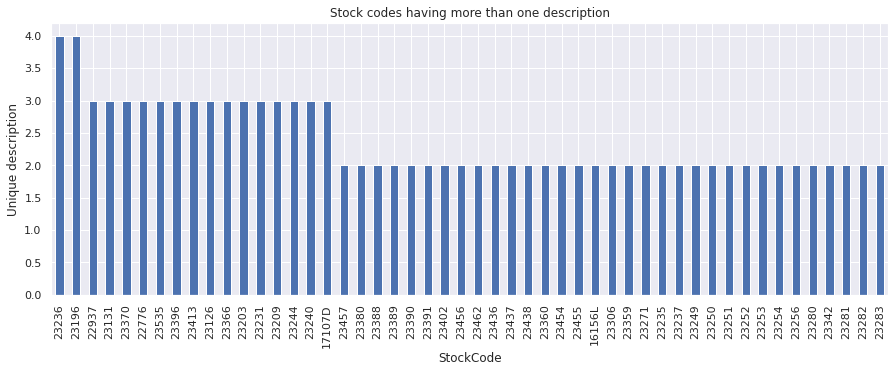

In [165]:
plt.figure(figsize = (15,5))
grouped = data_4.groupby("StockCode")["Description"].nunique()[data_4.groupby("StockCode")["Description"].nunique() > 1].sort_values(ascending = False)
grouped.head(50).plot.bar()
plt.title("Stock codes having more than one description")
plt.ylabel("Unique description")
plt.show()

In [166]:
data_4[data_4.StockCode == "23236"].Description.value_counts()

storage tin vintage doily      160
doiley storage tin             113
doiley biscuit tin              13
storage tin vintage doiley       1
Name: Description, dtype: int64

In [167]:
data_4[data_4.StockCode == "23283"].Description.value_counts()

doormat vintage leaf              121
doormat vintage leaves design      88
Name: Description, dtype: int64

In [168]:
print("There are {} stock codes with more than one Description".format(len(grouped)))

There are 213 stock codes with more than one Description


**Comment**:<br>
Some products have slightly different 'Description' but belong to same 'StockCode'. Let us deal with this by combining all the descriptions.
<br>

In [169]:
product_df = pd.DataFrame()
product_df['StockCode'] = data_4['StockCode']
product_df['Description']= data_4['Description']
product_df.head()

,StockCode,Description
0,85123A,white hanging heart t-light holder
1,71053,white metal lantern
2,84406B,cream cupid hearts coat hanger
3,84029G,knitted union flag hot water bottle
4,84029E,red woolly hottie white heart.


In [170]:
stop_words = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wl = nltk.WordNetLemmatizer()
#function to clean data
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [wl.lemmatize(word) for word in tokens if word not in stop_words]
    text = " ".join(word for word in text)
    # text = TextBlob(text).correct()
    return text

In [171]:
product_df['Description_new'] = product_df['Description'].apply(lambda x: clean_text(x))
product_df.head()

,StockCode,Description,Description_new
0,85123A,white hanging heart t-light holder,white hanging heart tlight holder
1,71053,white metal lantern,white metal lantern
2,84406B,cream cupid hearts coat hanger,cream cupid heart coat hanger
3,84029G,knitted union flag hot water bottle,knitted union flag hot water bottle
4,84029E,red woolly hottie white heart.,red woolly hottie white heart


In [172]:
product_df[data_4.StockCode == "23236"].Description_new.value_counts()

storage tin vintage doily      160
doiley storage tin             113
doiley biscuit tin              13
storage tin vintage doiley       1
Name: Description_new, dtype: int64

In [173]:
product_df.groupby("StockCode")["Description_new"].nunique()[product_df.groupby("StockCode")["Description_new"].nunique() > 1].sort_values(ascending = False)

StockCode
23236     4
23196     4
17107D    3
23203     3
22776     3
         ..
23068     2
23071     2
23075     2
23079     2
90014C    2
Name: Description_new, Length: 191, dtype: int64

**Comment**:<br>
From 213 we reduced the number of different descriptions for same stockcodes to 191

In [174]:
product_df = product_df[['StockCode']].join(
    product_df['Description_new'].str.split().explode().groupby(product_df['StockCode']).unique(), 
                                          on = "StockCode") #split the string, convert each element into a single row using explode and then group by stockcode and take unique elements

In [175]:
product_df.head()

,StockCode,Description_new
0,85123A,"[white, hanging, heart, tlight, holder, cream]"
1,71053,"[white, metal, lantern, moroccan]"
2,84406B,"[cream, cupid, heart, coat, hanger]"
3,84029G,"[knitted, union, flag, hot, water, bottle]"
4,84029E,"[red, woolly, hottie, white, heart]"


In [176]:
product_df[product_df.StockCode == "23236"].Description_new

218408    [doiley, storage, tin, biscuit, vintage, doily]
218586    [doiley, storage, tin, biscuit, vintage, doily]
219658    [doiley, storage, tin, biscuit, vintage, doily]
220367    [doiley, storage, tin, biscuit, vintage, doily]
220493    [doiley, storage, tin, biscuit, vintage, doily]
                               ...                       
527345    [doiley, storage, tin, biscuit, vintage, doily]
534004    [doiley, storage, tin, biscuit, vintage, doily]
534688    [doiley, storage, tin, biscuit, vintage, doily]
534700    [doiley, storage, tin, biscuit, vintage, doily]
538984    [doiley, storage, tin, biscuit, vintage, doily]
Name: Description_new, Length: 287, dtype: object

In [177]:
data_5 = data_4.copy()
data_5['Description'] = product_df['Description_new']
data_5['Description'] = data_5['Description'].str.join(' ')
data_5.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart tlight holder cream,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern moroccan,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid heart coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [178]:
all(data_5.groupby("StockCode")["Description"].nunique()>1) #so we dont have any more similar description

False

**Comment:** <br>
So each 'StockCode' now has a unique description.

In [179]:
data_5["UnitPrice"].describe()

count    392732.000000
mean          3.125596
std          22.240725
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

**Comment:** <br>
'UnitPrice' has a minimum value of 0. Lets see if we can find some pattern.


In [180]:
data_5[data_5["UnitPrice"]==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,plaster tin skull,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
56674,541109,22168,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom
86789,543599,84535B,fairy cake notebook a6 size,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom
130188,547417,22062,ceramic bowl love heart design,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom
139453,548318,22055,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom
145208,548871,22162,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom


**Comment:** <br>
We donot find any pattern. <br>
Lets remove rows where 'UnitPrice' is 0.

In [181]:
data_6 = data_5[data_5.UnitPrice > 0]
print('After removing rows where Unit Price is zero, there are {} samples in the dataset.'.format(len(data_6)))

After removing rows where Unit Price is zero, there are 392692 samples in the dataset.


# **3.Feature Engineering**

In this section we will be adding some new features to our existing data

In [182]:
df = data_6.copy()

#### Removing outliers for numerical quantities
Let us first remove outliers for 'UnitPrice' and 'Quantity'

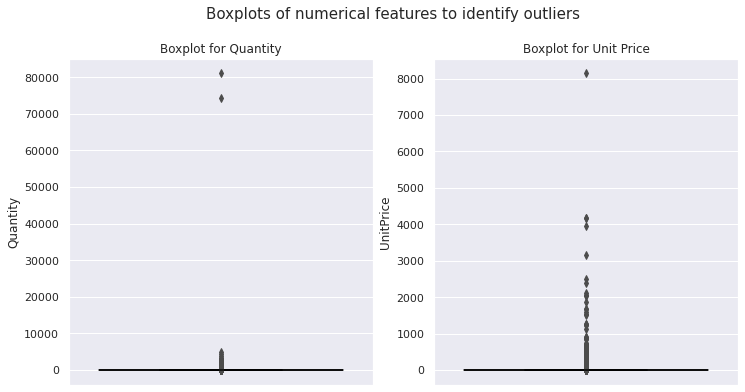

In [183]:
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(y=df['Quantity'],ax = ax1, **PROPS).set_title("Boxplot for Quantity")
sns.boxplot( y=df['UnitPrice'],ax = ax2, **PROPS).set_title("Boxplot for Unit Price")
plt.suptitle('Boxplots of numerical features to identify outliers', y = 1,fontsize = 15)
plt.show();

In [184]:
def outlier_removal(X,thresh = 1.5):
    X_copy = X.copy()
    for x in X.columns:
        q75,q25 = np.percentile(X.loc[:,x],[75,25])
        intr_qr = q75-q25

        max_val = q75+(thresh*intr_qr)
        min_val = q25-(thresh*intr_qr)

        X_copy.loc[X[x] < min_val,x] = np.nan
        X_copy.loc[X[x] > max_val,x] = np.nan
    return X_copy

In [185]:
df_O = df.copy()

In [186]:
df_O.loc[:,['Quantity','UnitPrice']] = outlier_removal(df.loc[:,['Quantity','UnitPrice']],thresh = 1.5)

In [187]:
df_O = df_O.dropna(axis = 0)

In [188]:
print('After removing outliers, there are {} samples in the dataset.'.format(len(df_O)))

After removing outliers, there are 333234 samples in the dataset.


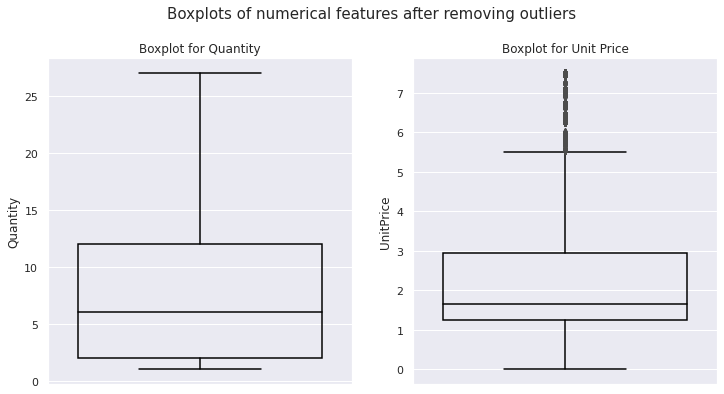

In [189]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(y=df_O['Quantity'],ax = ax1, **PROPS).set_title("Boxplot for Quantity")
sns.boxplot( y=df_O['UnitPrice'],ax = ax2, **PROPS).set_title("Boxplot for Unit Price")
plt.suptitle('Boxplots of numerical features after removing outliers', y = 1,fontsize = 15)
plt.show();

**Comment:** <br>
The price and the quantities of entries show some outliers. <br>
However in this case we will be keeping outliers because the outliers donot appear to be due to incorrectly entered or measured data but rather due to some special transactions or rare occurences.


#### Adding total price

In [190]:
#Feature : Total Price
df['TotalPrice'] = df['UnitPrice']*df['Quantity']
df = df.iloc[:,[6,0,4,1,2,3,5,8,7]]

In [191]:
df.head(5)

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,TotalPrice,Country
0,17850.0,536365,2010-12-01 08:26:00,85123A,white hanging heart tlight holder cream,6,2.55,15.30,United Kingdom
1,17850.0,536365,2010-12-01 08:26:00,71053,white metal lantern moroccan,6,3.39,20.34,United Kingdom
2,17850.0,536365,2010-12-01 08:26:00,84406B,cream cupid heart coat hanger,8,2.75,22.00,United Kingdom
3,17850.0,536365,2010-12-01 08:26:00,84029G,knitted union flag hot water bottle,6,3.39,20.34,United Kingdom
4,17850.0,536365,2010-12-01 08:26:00,84029E,red woolly hottie white heart,6,3.39,20.34,United Kingdom


#### Adding time based features

In [192]:
df.insert(loc = 3, column = 'Year',value = df["InvoiceDate"].apply(lambda x: x.year))
df.insert(loc = 4, column = 'Month', value = df["InvoiceDate"].apply(lambda x: x.month))
df.insert(loc = 5, column = 'MonthYear', value = df["InvoiceDate"].apply(lambda x: x.to_period('M')))
df.insert(loc = 6, column = 'Weekday', value = df["InvoiceDate"].apply(lambda x: x.weekday()))
df.insert(loc = 7, column = 'Day', value= df["InvoiceDate"].apply(lambda x: x.day))
df.insert(loc = 8, column = 'Hour', value = df["InvoiceDate"].apply(lambda x: x.hour))

In [193]:
df.CustomerID = df.CustomerID.astype(int)
df.head()

,CustomerID,InvoiceNo,InvoiceDate,Year,Month,MonthYear,Weekday,Day,Hour,StockCode,Description,Quantity,UnitPrice,TotalPrice,Country
0,17850,536365,2010-12-01 08:26:00,2010,12,2010-12,2,1,8,85123A,white hanging heart tlight holder cream,6,2.55,15.30,United Kingdom
1,17850,536365,2010-12-01 08:26:00,2010,12,2010-12,2,1,8,71053,white metal lantern moroccan,6,3.39,20.34,United Kingdom
2,17850,536365,2010-12-01 08:26:00,2010,12,2010-12,2,1,8,84406B,cream cupid heart coat hanger,8,2.75,22.00,United Kingdom
3,17850,536365,2010-12-01 08:26:00,2010,12,2010-12,2,1,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,United Kingdom
4,17850,536365,2010-12-01 08:26:00,2010,12,2010-12,2,1,8,84029E,red woolly hottie white heart,6,3.39,20.34,United Kingdom


**Comment:** <br>
Now that we have added more features to the dataset lets perform exploratory analysis

# **4.Exploratory Data Analysis**

#### Analysis of Customer Purchasing pattern

In [194]:
def plot_graphs_customer(df,field,string):
    # creating a dictionary
    font = {'size': 12}

    # using rc function
    plt.rc('font', **font)
    fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(25,25))
    df.plot.bar(x = field,y = 'TotalPrice',color = color[0],ax = ax[0],rot = 0)
    add_value_labels(ax[0])
    ax[0].set_ylabel('TotalPrice')
    ax[0].set_title('Amount Spent for different '+ string)
    df.plot.bar(x = field,y = 'TransactionCount',color = color[1],ax = ax[1],rot = 0)
    add_value_labels(ax[1])
    ax[1].set_ylabel('TransactionCount')
    ax[1].set_title('Transaction count for different '+ string)
    df.plot.bar(x = field,y = 'Quantity',color = color[2],ax = ax[2],rot = 0)
    ax[2].set_ylabel('Quantity')
    ax[2].set_title('Item quantity for different ' + string)
    add_value_labels(ax[2])
    plt.show()

In [195]:
df_week = df.groupby('Weekday').agg({'TotalPrice':'sum',
                                                  'Quantity': 'sum',
                                                  'InvoiceNo': 'count'}).rename(columns={'InvoiceNo':'TransactionCount'})
df_week = df_week.reset_index()
df_week['Weekday'] = df_week['Weekday'].apply(lambda x: calendar.day_abbr[x])
df_week

,Weekday,TotalPrice,Quantity,TransactionCount
0,Mon,1363604.401,766911,64231
1,Tue,1697733.801,1005760,65744
2,Wed,1584283.830,960082,68040
3,Thu,1973015.730,1149619,79243
4,Fri,1483080.811,808648,54222
5,Sun,785490.321,460982,61212


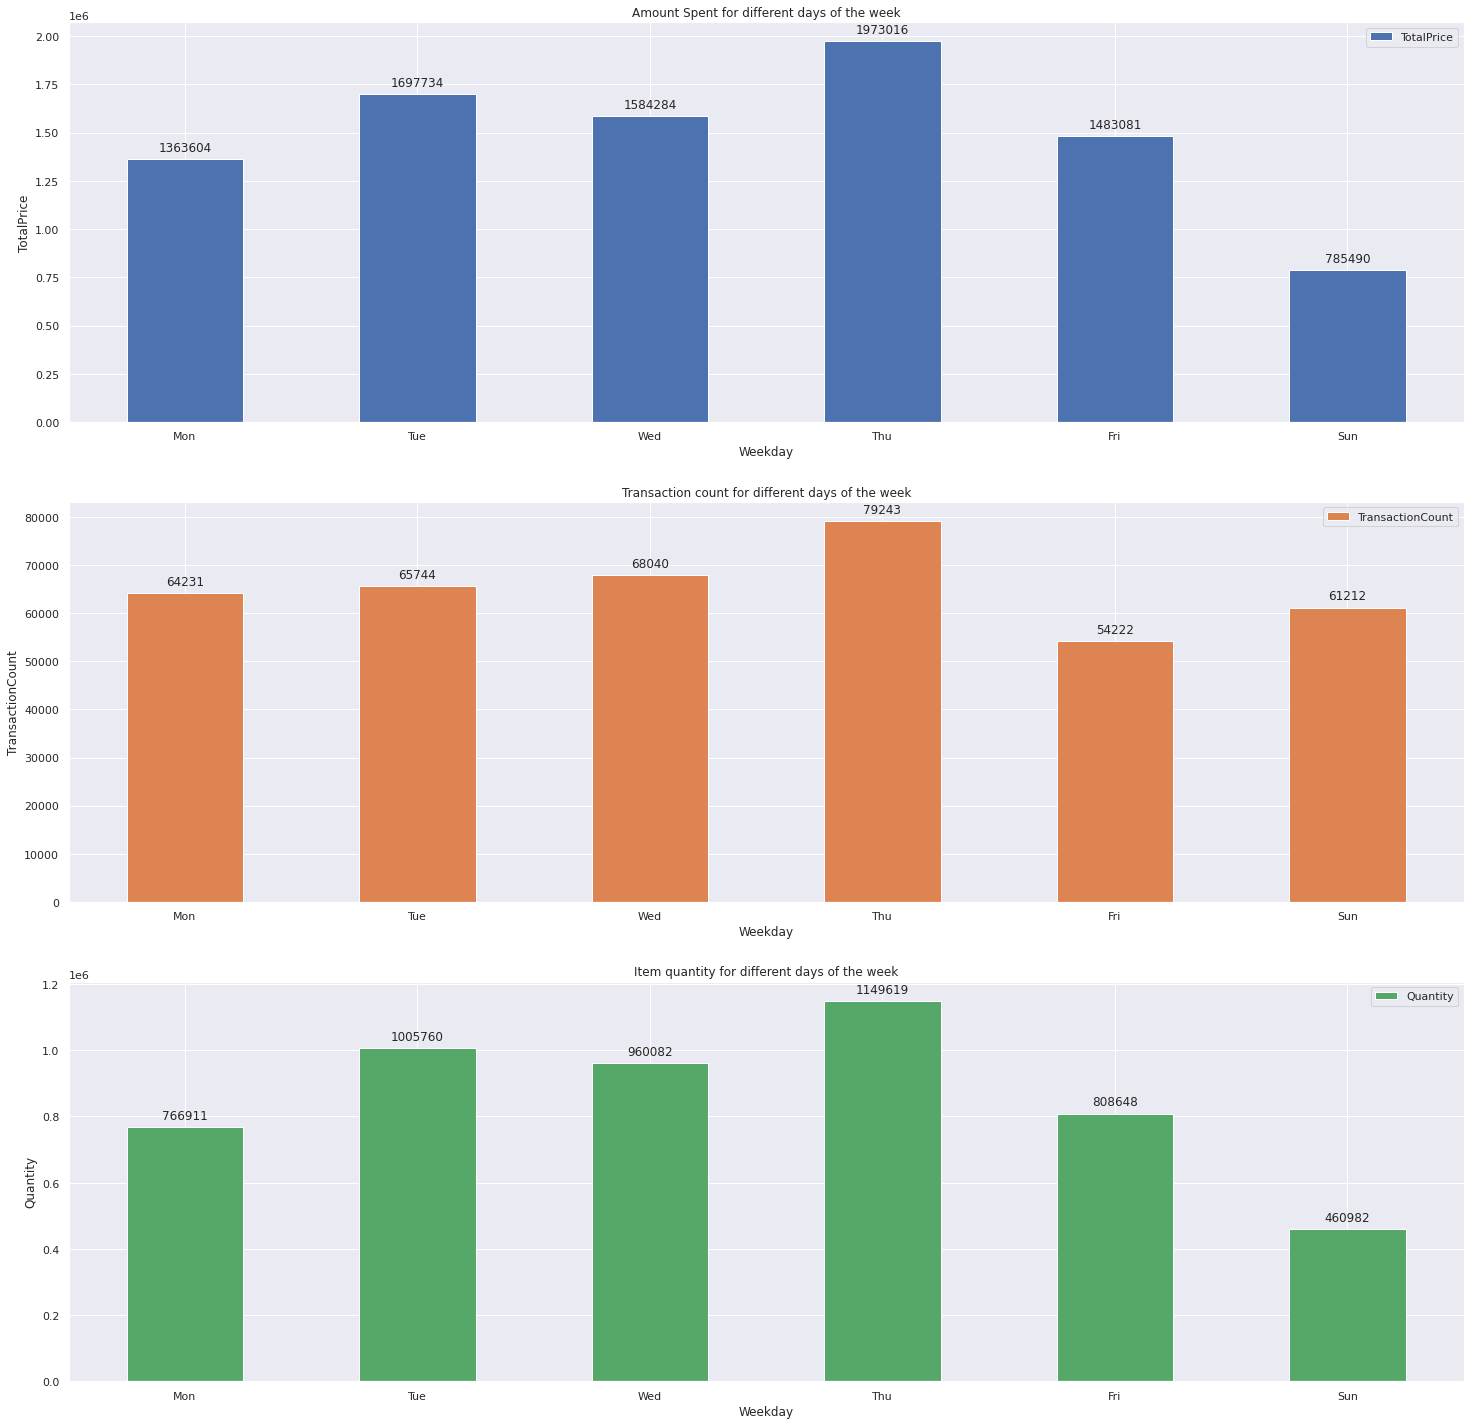

In [196]:
plot_graphs_customer(df_week, field = 'Weekday', string = 'days of the week')

In [197]:
df_day = df.groupby('Day').agg({'TotalPrice':'sum',
                                                  'Quantity': 'sum',
                                                  'InvoiceNo': 'count'}).rename(columns={'InvoiceNo':'TransactionCount'})
df_day = df_day.reset_index()
df_day

,Day,TotalPrice,Quantity,TransactionCount
0,1,285757.290,170202,13487
1,2,256052.150,152332,11922
2,3,284865.290,147565,10724
3,4,328429.990,192118,14632
4,5,352632.710,215630,16127
5,6,335653.110,197736,18076
6,7,376040.250,205451,15426
7,8,295838.500,173294,15621
8,9,459306.140,248454,12792
9,10,324485.240,163588,13932


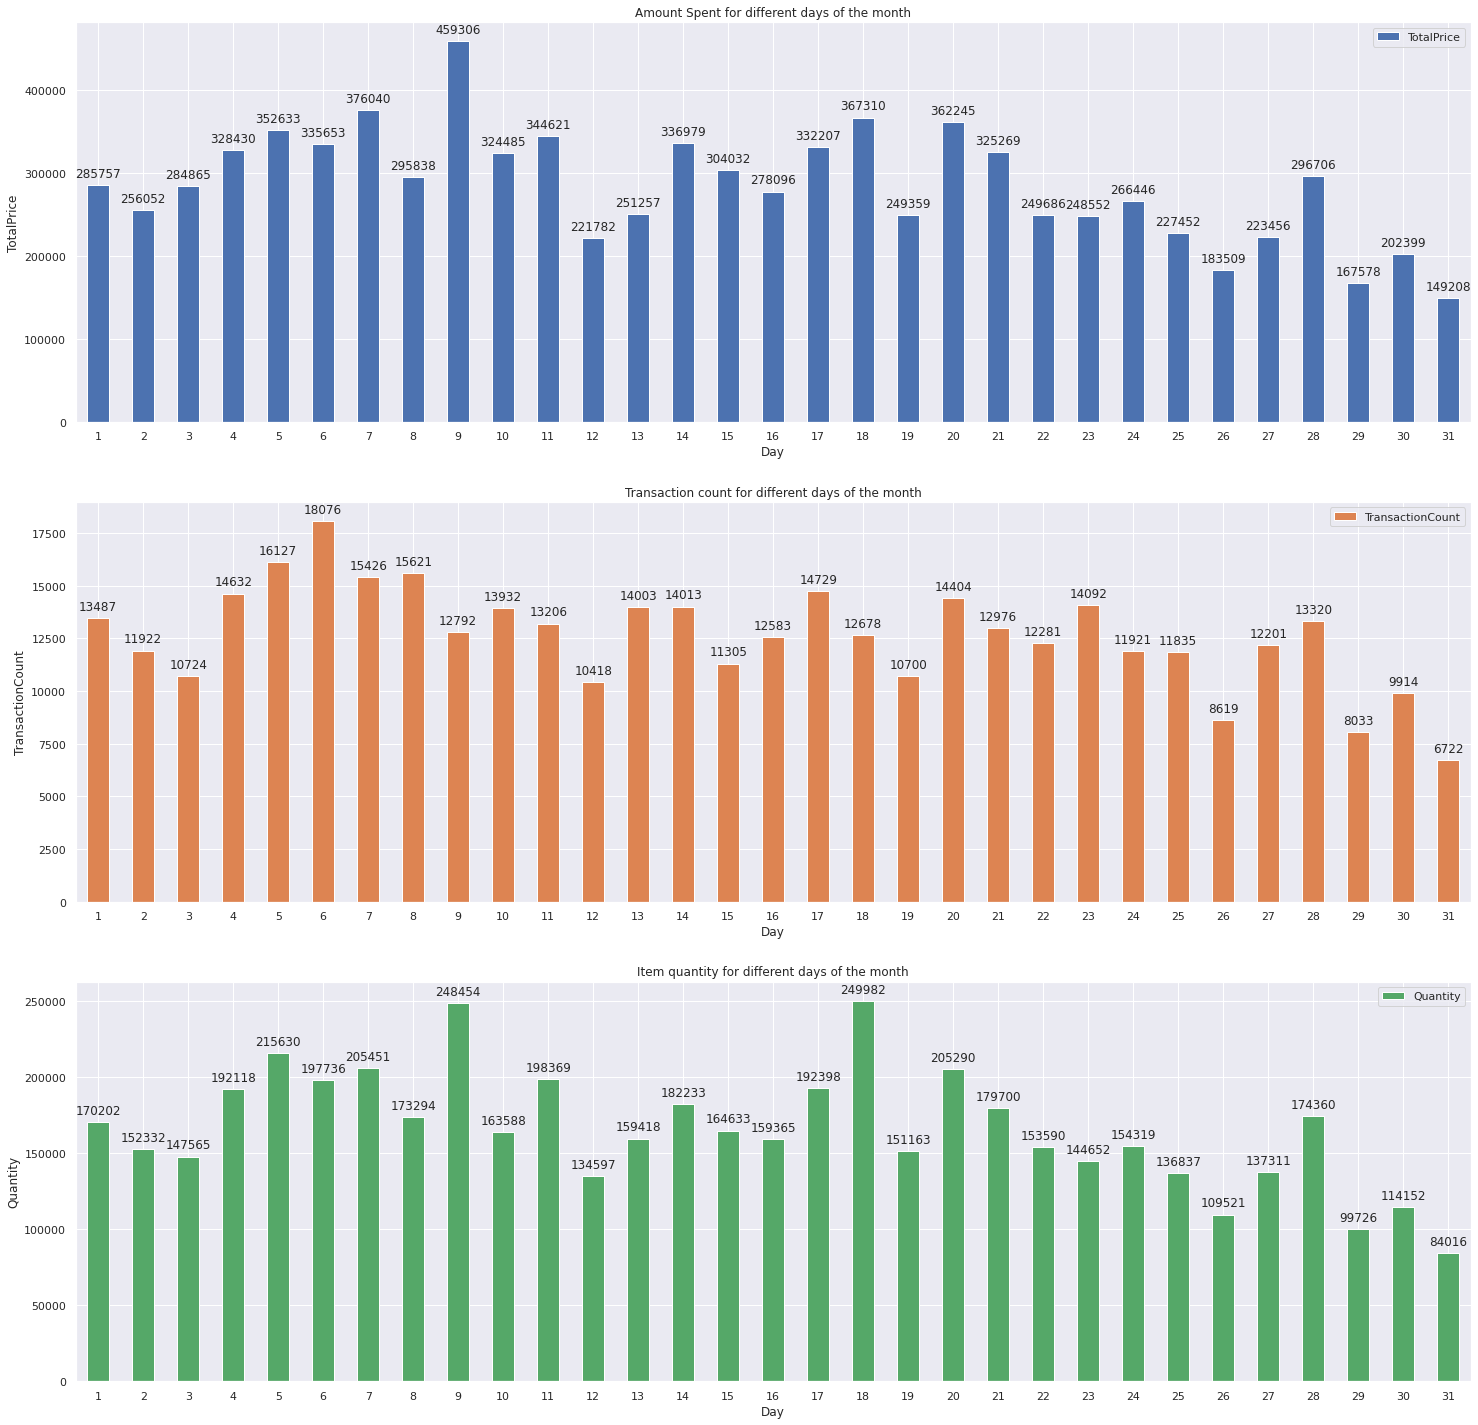

In [198]:
plot_graphs_customer(df_day, field = 'Day', string = 'days of the month')

In [199]:
df_hour = df.groupby('Hour').agg({'TotalPrice':'sum',
                                                  'Quantity': 'sum',
                                                  'InvoiceNo': 'count'}).rename(columns={'InvoiceNo':'TransactionCount'})
df_hour = df_hour.reset_index()
df_hour

,Hour,TotalPrice,Quantity,TransactionCount
0,6,4.250,1,1
1,7,31059.210,15370,379
2,8,281997.790,157815,8687
3,9,842392.341,482216,21927
4,10,1259267.591,774799,37773
5,11,1101177.600,645056,48365
6,12,1373695.390,822368,70938
7,13,1168724.200,680275,63019
8,14,991992.821,555896,53251
9,15,963559.680,539004,44790


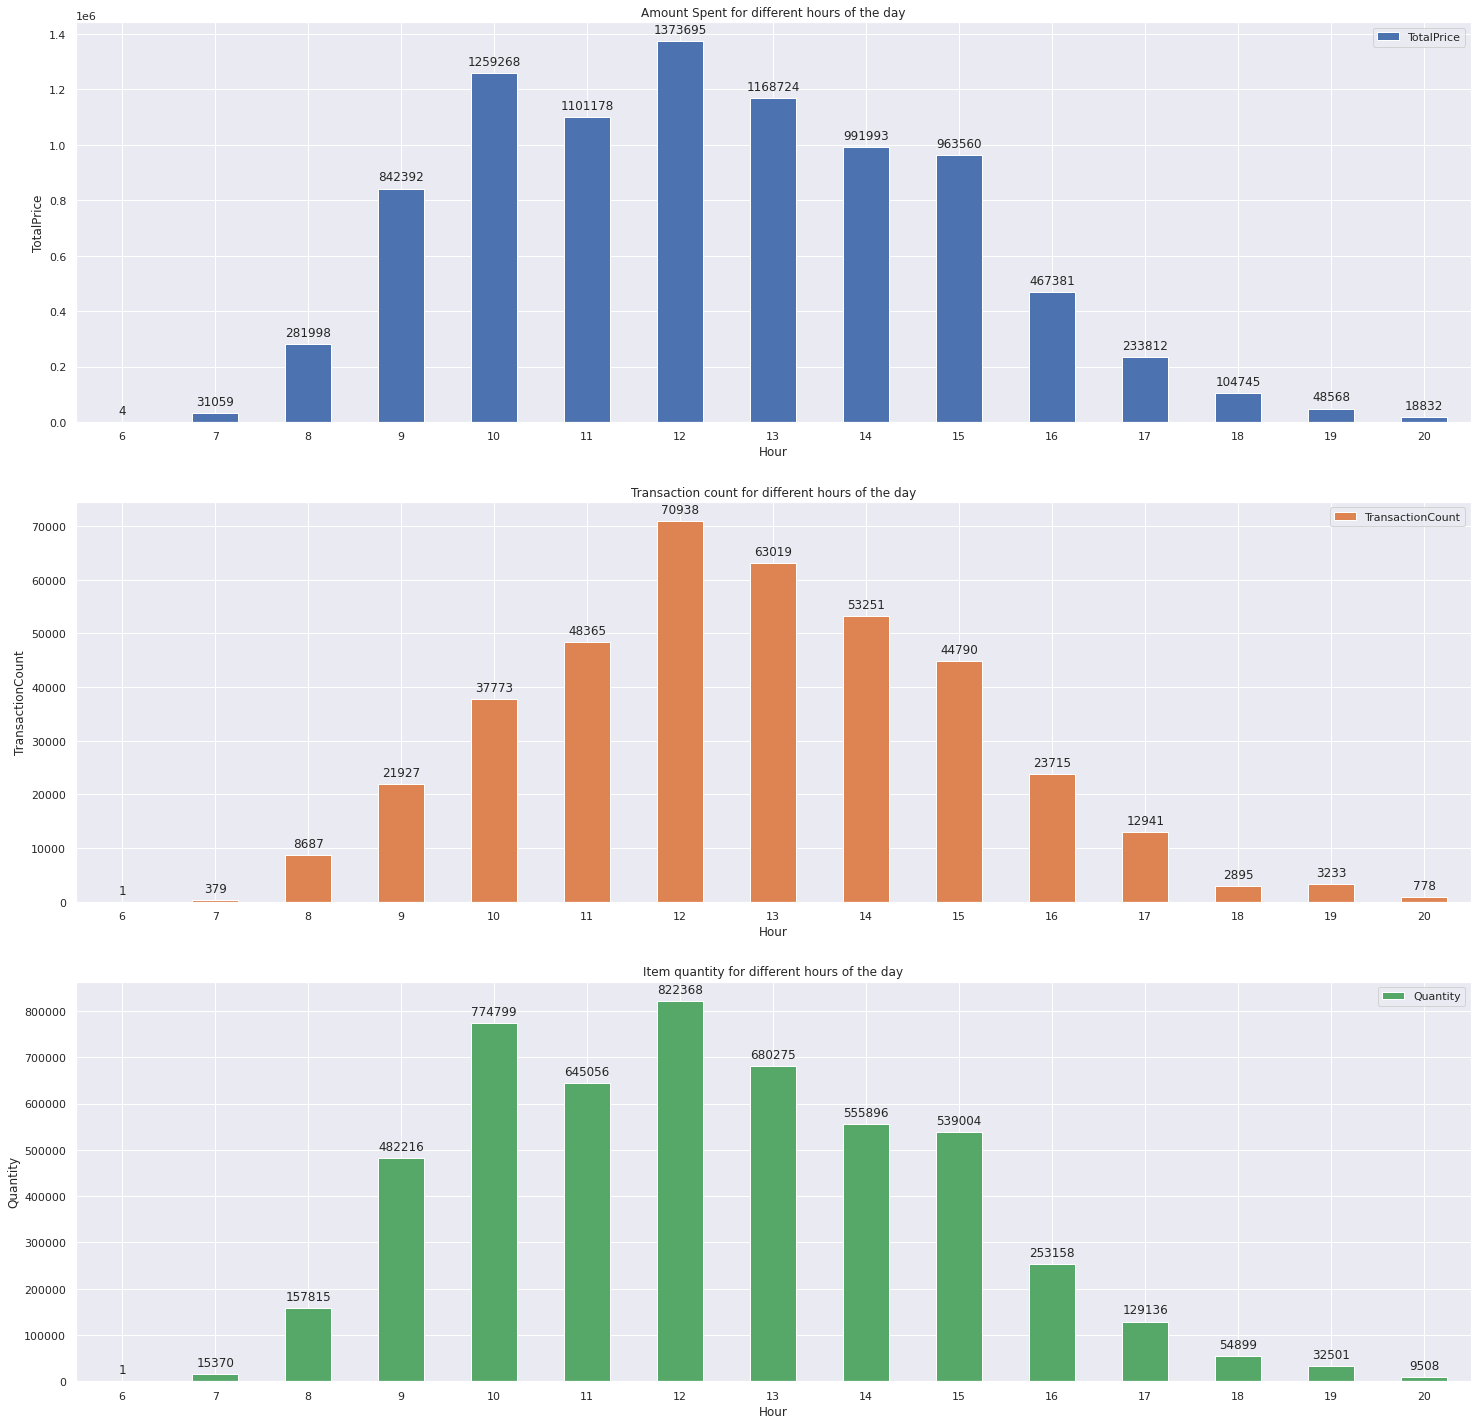

In [200]:
plot_graphs_customer(df_hour, field = 'Hour', string = 'hours of the day')

In [201]:
df_myear = df.groupby('MonthYear').agg({'TotalPrice':'sum',
                                                  'Quantity': 'sum',
                                                  'InvoiceNo': 'count'}).rename(columns={'InvoiceNo':'TransactionCount'})
df_myear = df_myear.reset_index()
df_myear

,MonthYear,TotalPrice,Quantity,TransactionCount
0,2010-12,570422.730,311048,25670
1,2011-01,568101.310,348473,20988
2,2011-02,446084.920,265027,19706
3,2011-03,594081.760,347582,26870
4,2011-04,468374.331,291366,22433
5,2011-05,677355.150,372864,28073
6,2011-06,660046.050,363014,26926
7,2011-07,598962.901,367360,26580
8,2011-08,644051.040,397373,26790
9,2011-09,950690.202,543652,39669


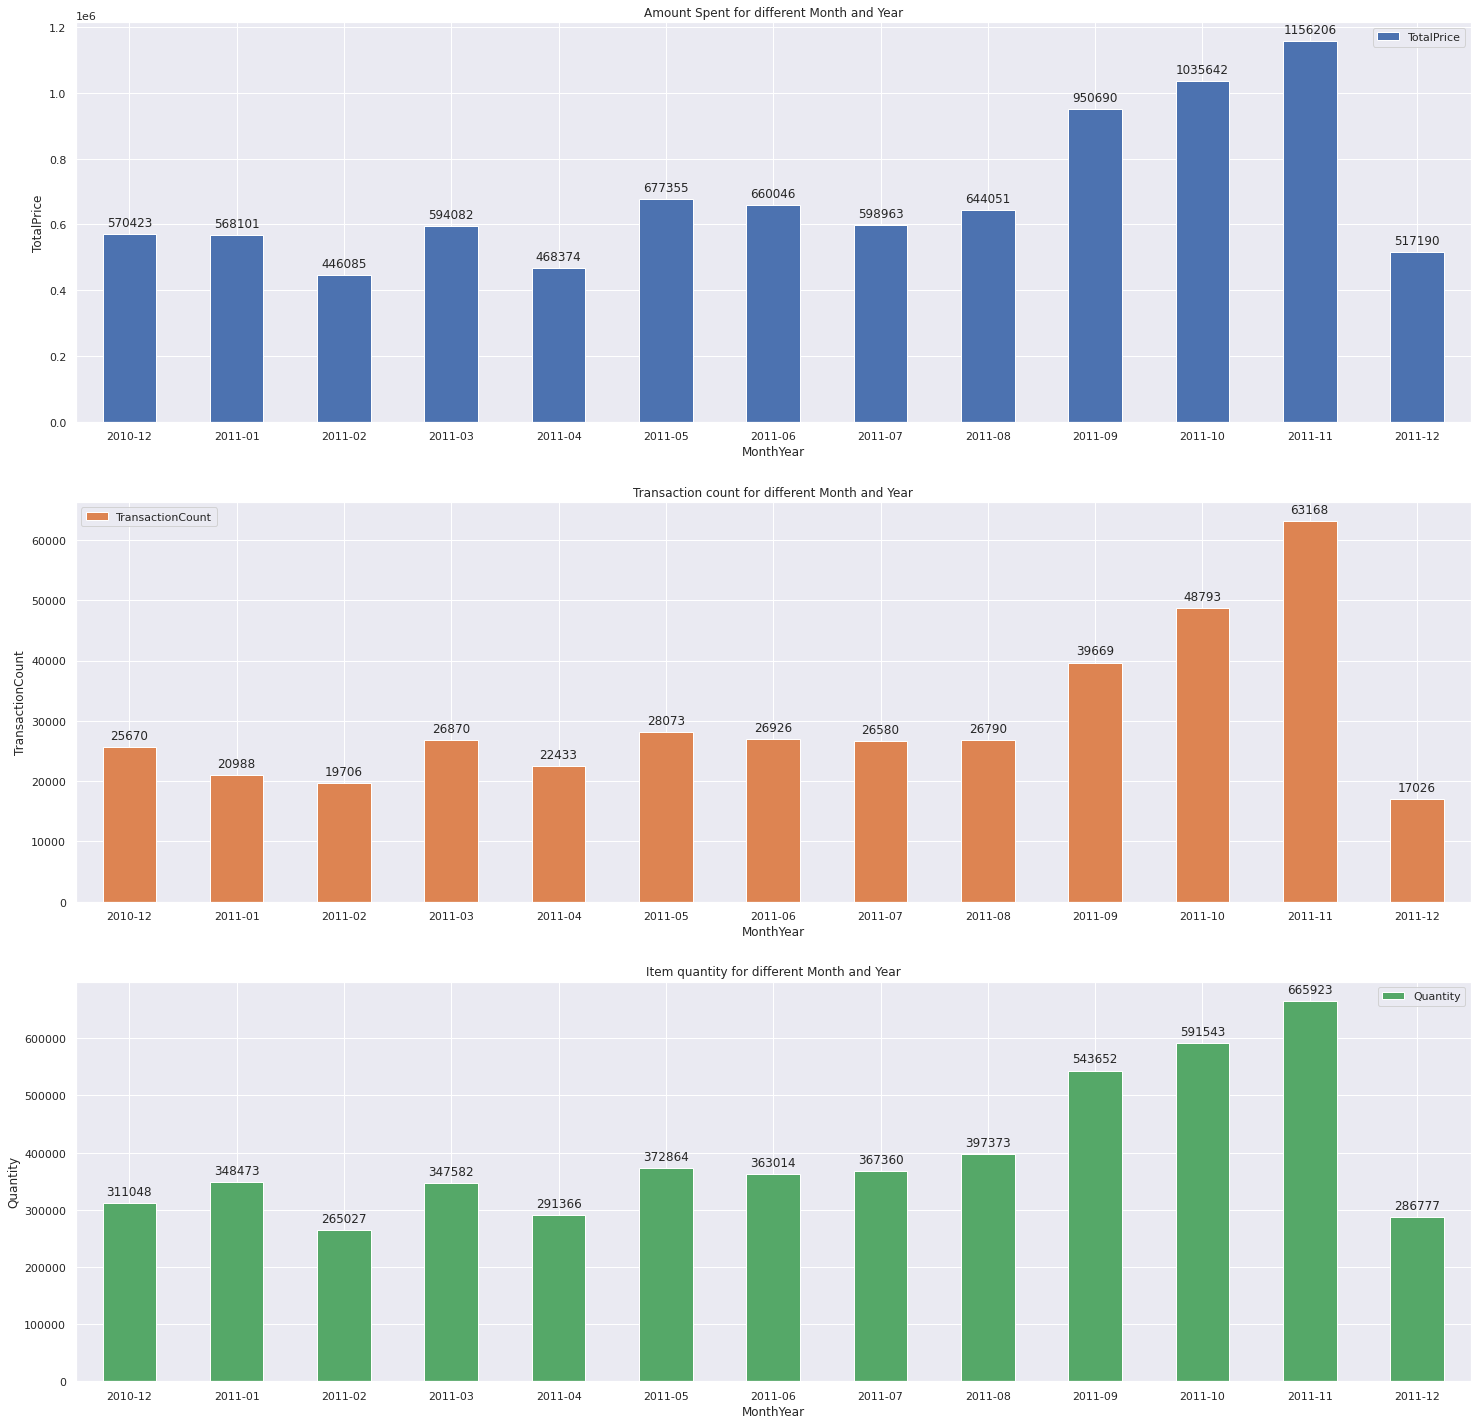

In [202]:
plot_graphs_customer(df_myear, field = 'MonthYear', string = 'Month and Year')

#### Transactions made by customers

In [203]:
df1 = df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().rename(columns={'InvoiceNo':'TransactionCount'})
df1.head(10)

,CustomerID,Country,TransactionCount
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17
5,12352,Norway,85
6,12353,Bahrain,4
7,12354,Spain,58
8,12355,Bahrain,13
9,12356,Portugal,59


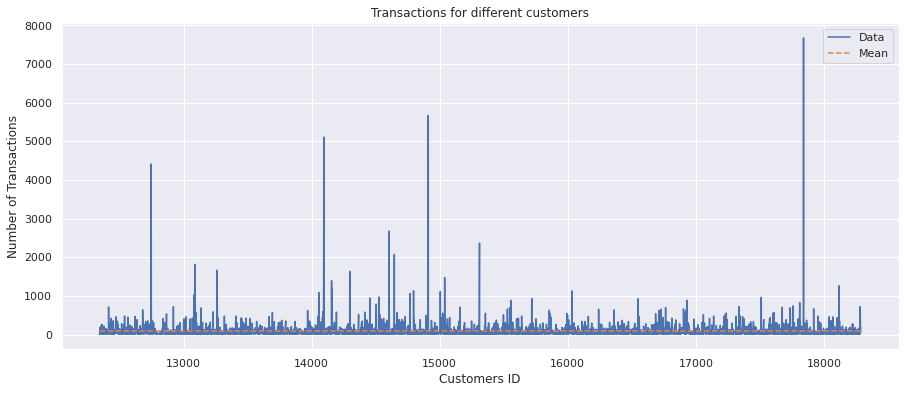

In [204]:
sns.set_theme(style="darkgrid")
plt.subplots(figsize=(15,6))
plt.plot(df1['CustomerID'], df1['TransactionCount'], label = 'Data')
mean_line = plt.plot(df1['CustomerID'],[df1['TransactionCount'].mean()]*len(df1) , label='Mean', linestyle='--')
plt.xlabel('Customers ID')
plt.ylabel('Number of Transactions')
plt.title('Transactions for different customers')
plt.legend(loc='upper right')
plt.show()

In [205]:
df1_s = df1.sort_values(by = 'TransactionCount',ascending = False)[:10]

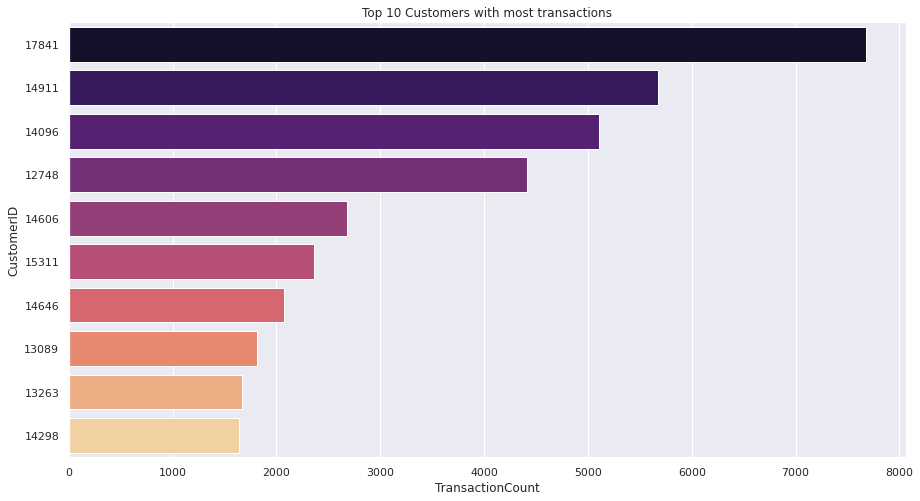

In [206]:
fig, ax = plt.subplots(figsize = (15,8))

sns.barplot(y = df1_s.CustomerID, x = df1_s.TransactionCount, orient = "h", 
            ax = ax, order = df1_s.CustomerID, palette = 'magma')

plt.title("Top 10 Customers with most transactions")
plt.ylabel("CustomerID")
plt.xlabel("TransactionCount")

plt.show()

In [207]:
df1_s1 = df.Country.value_counts().sort_values(ascending = False)[:10]

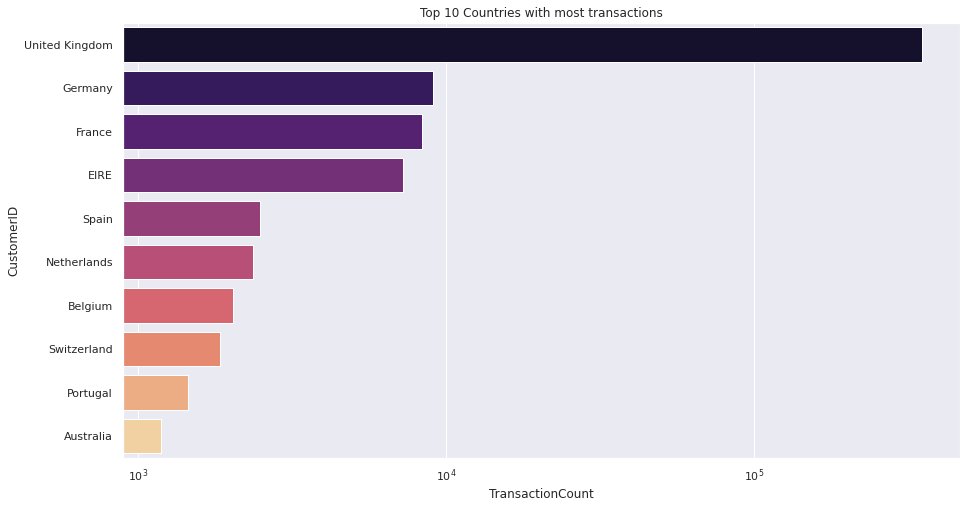

In [208]:
fig, ax = plt.subplots(figsize = (15,8))

sns.barplot(y = df1_s1.index, x = df1_s1.values, orient = "h", 
            ax = ax, order = df1_s1.index, palette = 'magma')

plt.title("Top 10 Countries with most transactions")
plt.xscale("log")
plt.ylabel("CustomerID")
plt.xlabel("TransactionCount")
plt.show()

#### Amount paid by customers

In [209]:
df2 = df.groupby(by=['CustomerID','Country'], as_index=False)['TotalPrice'].sum().rename(columns={'TotalPrice':'AmountSpent'})
df2.head(10)


,CustomerID,Country,AmountSpent
0,12346,United Kingdom,77183.60
1,12347,Iceland,4310.00
2,12348,Finland,1797.24
3,12349,Italy,1757.55
4,12350,Norway,334.40
5,12352,Norway,2506.04
6,12353,Bahrain,89.00
7,12354,Spain,1079.40
8,12355,Bahrain,459.40
9,12356,Portugal,2811.43


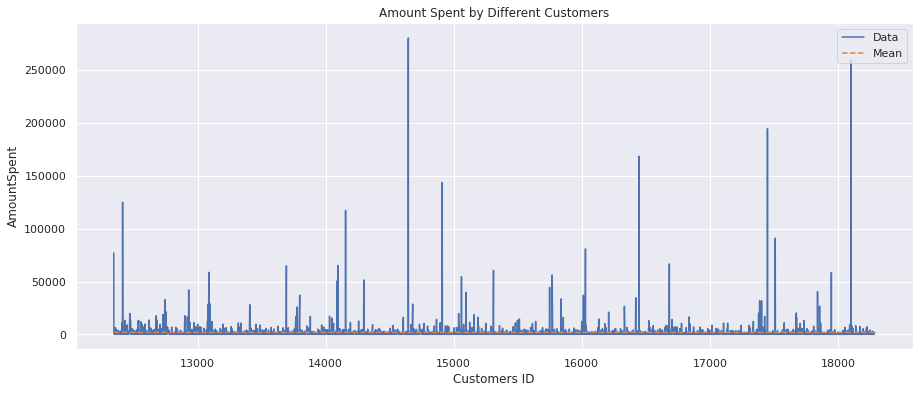

In [210]:
sns.set_theme(style="darkgrid")
plt.subplots(figsize=(15,6))
plt.plot(df2['CustomerID'], df2['AmountSpent'], label = 'Data')
mean_line = plt.plot(df2['CustomerID'],[df2['AmountSpent'].mean()]*len(df1) , label='Mean', linestyle='--')
plt.xlabel('Customers ID')
plt.ylabel('AmountSpent')
plt.title('Amount Spent by Different Customers')
plt.legend(loc='upper right')
plt.show()

In [211]:
df2_s = df2.sort_values(by = 'AmountSpent',ascending = False)[:10]

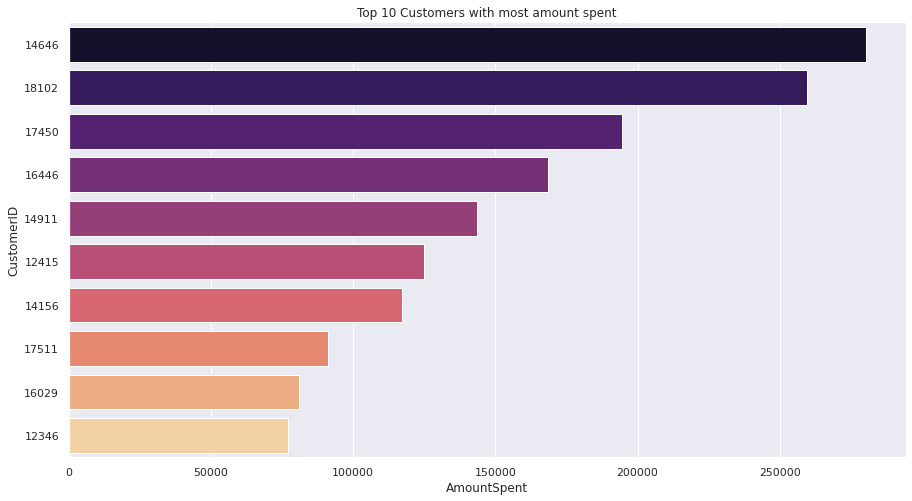

In [212]:
fig, ax = plt.subplots(figsize = (15,8))

sns.barplot(y = df2_s.CustomerID, x = df2_s.AmountSpent, orient = "h", 
            ax = ax, order = df2_s.CustomerID, palette = 'magma')

plt.title("Top 10 Customers with most amount spent")
plt.ylabel("CustomerID")
plt.xlabel("AmountSpent")

plt.show()

In [213]:
df2_s1 = df2.groupby('Country')['AmountSpent'].sum().sort_values(ascending = False)[:10]

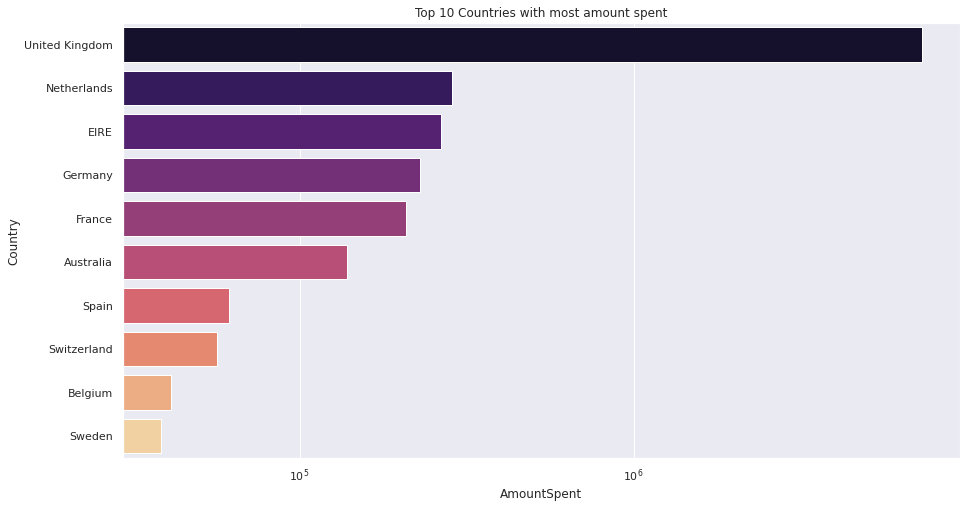

In [214]:
fig, ax = plt.subplots(figsize = (15,8))

sns.barplot(y = df2_s1.index, x = df2_s1.values, orient = "h", 
            ax = ax, order = df2_s1.index, palette = 'magma')

plt.title("Top 10 Countries with most amount spent")
plt.xscale("log")
plt.ylabel("Country")
plt.xlabel("AmountSpent")
plt.show()

In [215]:
#More analysis to be added later [4]

# **5.RFM Analysis**

RFM framework is a marketing analysis method to determine customer value by looking at the following three quantitative factors:

* Recency: How recently the customer makes a purchase? 
* Frequency: How often the customer makes a purchase?
* Monetary value: How much money the customer spends on purchases?
When used properly, RFM becomes a powerful tool to identify the most valuable customers in a business.

In [216]:
print("Min date: {} \nMax date: {}".format(df.InvoiceDate.min(), df.InvoiceDate.max()))

Min date: 2010-12-01 08:26:00 
Max date: 2011-12-09 12:50:00


In [217]:
last_day = df.InvoiceDate.max() + dt.timedelta(days = 1)
print("Todays date:{}".format(last_day))

Todays date:2011-12-10 12:50:00


In [218]:
#aggregrating data at customer level
rfm = df.groupby("CustomerID").agg({"InvoiceDate": lambda x: (last_day - x.max()).days,
                                         "InvoiceNo": "nunique",
                                         "TotalPrice": "sum"})
rfm.columns = ['Recency','Frequency','Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,19,1,1757.55
12350,310,1,334.40


In [219]:
rfm['R'] = pd.qcut(rfm['Recency'],5,labels=[5,4,3,2,1])

rfm['F'] = pd.qcut(rfm['Frequency'].rank(method="first"),5,labels=[1,2,3,4,5]) #rank in the method they appear and given different unique ranks

rfm['M'] = pd.qcut(rfm['Monetary'],5,labels=[1,2,3,4,5])

rfm['RFM_segment'] = (rfm['R'].astype(str)+ rfm['F'].astype(str) + rfm['M'].astype(str))

rfm['RFM_score'] = rfm[['R','F','M']].sum(axis = 1)

rfm.head()



,Recency,Frequency,Monetary,R,F,M,RFM_segment,RFM_score
CustomerID,,,,,,,,
12346,326,1,77183.60,1,1,5,115,7
12347,2,7,4310.00,5,5,5,555,15
12348,75,4,1797.24,2,4,4,244,10
12349,19,1,1757.55,4,1,4,414,9
12350,310,1,334.40,1,1,2,112,4


* **Champions**: Bought recently, buy often and spend the most
* **Loyal customers**: Buy on a regular basis. Responsive to promotions.
* **Potential loyalist**: Recent customers with average frequency.
* **Recent customers**: Bought most recently, but not often.
* **Promising**: Recent shoppers, but haven’t spent much.
* **Needs attention**: Above average recency, frequency and monetary values. May not have bought very recently though.
* **About to sleep**: Below average recency and frequency. Will lose them if not reactivated.
* **At risk**: Some time since they’ve purchased. Need to bring them back!
* **Can’t lose them**: Used to purchase frequently but haven’t returned for a long time.
* **Hibernating**: Last purchase was long back and low number of orders. May be lost.



In [220]:
segt_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About To Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm['Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()


,Recency,Frequency,Monetary,R,F,M,RFM_segment,RFM_score,Segment
CustomerID,,,,,,,,,
12346,326,1,77183.60,1,1,5,115,7,Hibernating
12347,2,7,4310.00,5,5,5,555,15,Champions
12348,75,4,1797.24,2,4,4,244,10,At Risk
12349,19,1,1757.55,4,1,4,414,9,Promising
12350,310,1,334.40,1,1,2,112,4,Hibernating


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

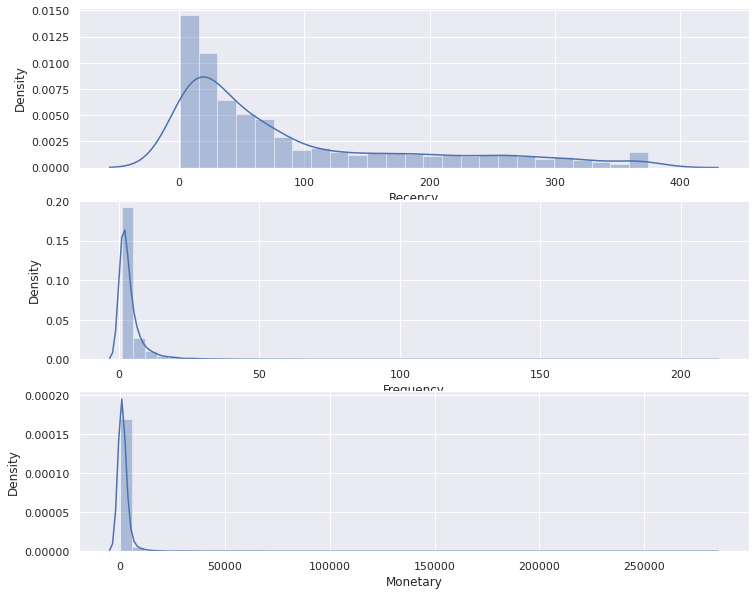

In [221]:
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(rfm['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(rfm['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(rfm['Monetary'])
# Show the plot
plt.show()

**Comment**:<br>
The plots show that our data is heavily skewed.

In [222]:
rfm_stats = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

rfm_stats.head()

Recency Frequency Monetary      
                  mean      mean     mean count
Segment                                        
About To Sleep    53.5       1.2    459.0   351
At Risk          155.1       2.9   1072.9   580
Can't Loose      132.4       8.4   2790.1    63
Champions          5.9      12.4   6843.2   633
Hibernating      217.9       1.1    486.7  1065

In [223]:
rfm_stats.columns = rfm_stats.columns.droplevel()
rfm_stats

,mean,mean,mean,count
Segment,,,,
About To Sleep,53.5,1.2,459.0,351
At Risk,155.1,2.9,1072.9,580
Can't Loose,132.4,8.4,2790.1,63
Champions,5.9,12.4,6843.2,633
Hibernating,217.9,1.1,486.7,1065
Loyal Customers,33.5,6.5,2848.3,827
Need Attention,53.1,2.3,884.2,186
New Customers,6.9,1.0,385.0,42
Potential Loyalists,17.1,2.0,1030.1,492


In [224]:
rfm_stats.columns = ['Recency_Mean','Frequency_Mean','Monetary_Mean', 'Count']

In [225]:
rfm_stats = rfm_stats.sort_values('Count',ascending = False)
rfm_stats.head()

,Recency_Mean,Frequency_Mean,Monetary_Mean,Count
Segment,,,,
Hibernating,217.9,1.1,486.7,1065
Loyal Customers,33.5,6.5,2848.3,827
Champions,5.9,12.4,6843.2,633
At Risk,155.1,2.9,1072.9,580
Potential Loyalists,17.1,2.0,1030.1,492


In [226]:
#Creating labels

labels = []

for i in range(len(rfm_stats)):

    str1 =  rfm_stats.index[i]
    customers = round(rfm_stats.Count[i]/rfm_stats.Count.sum() *100,1)
    str2 = 'Total Customers: '+ customers.astype(str) + "%"
    str3 = 'Avg Monetary Value: '+ rfm_stats.Monetary_Mean[i].astype(str)
    total = str1 + "\n" + str2 + "\n" + str3
    total = inspect.cleandoc(total)
    labels.append(total)
    

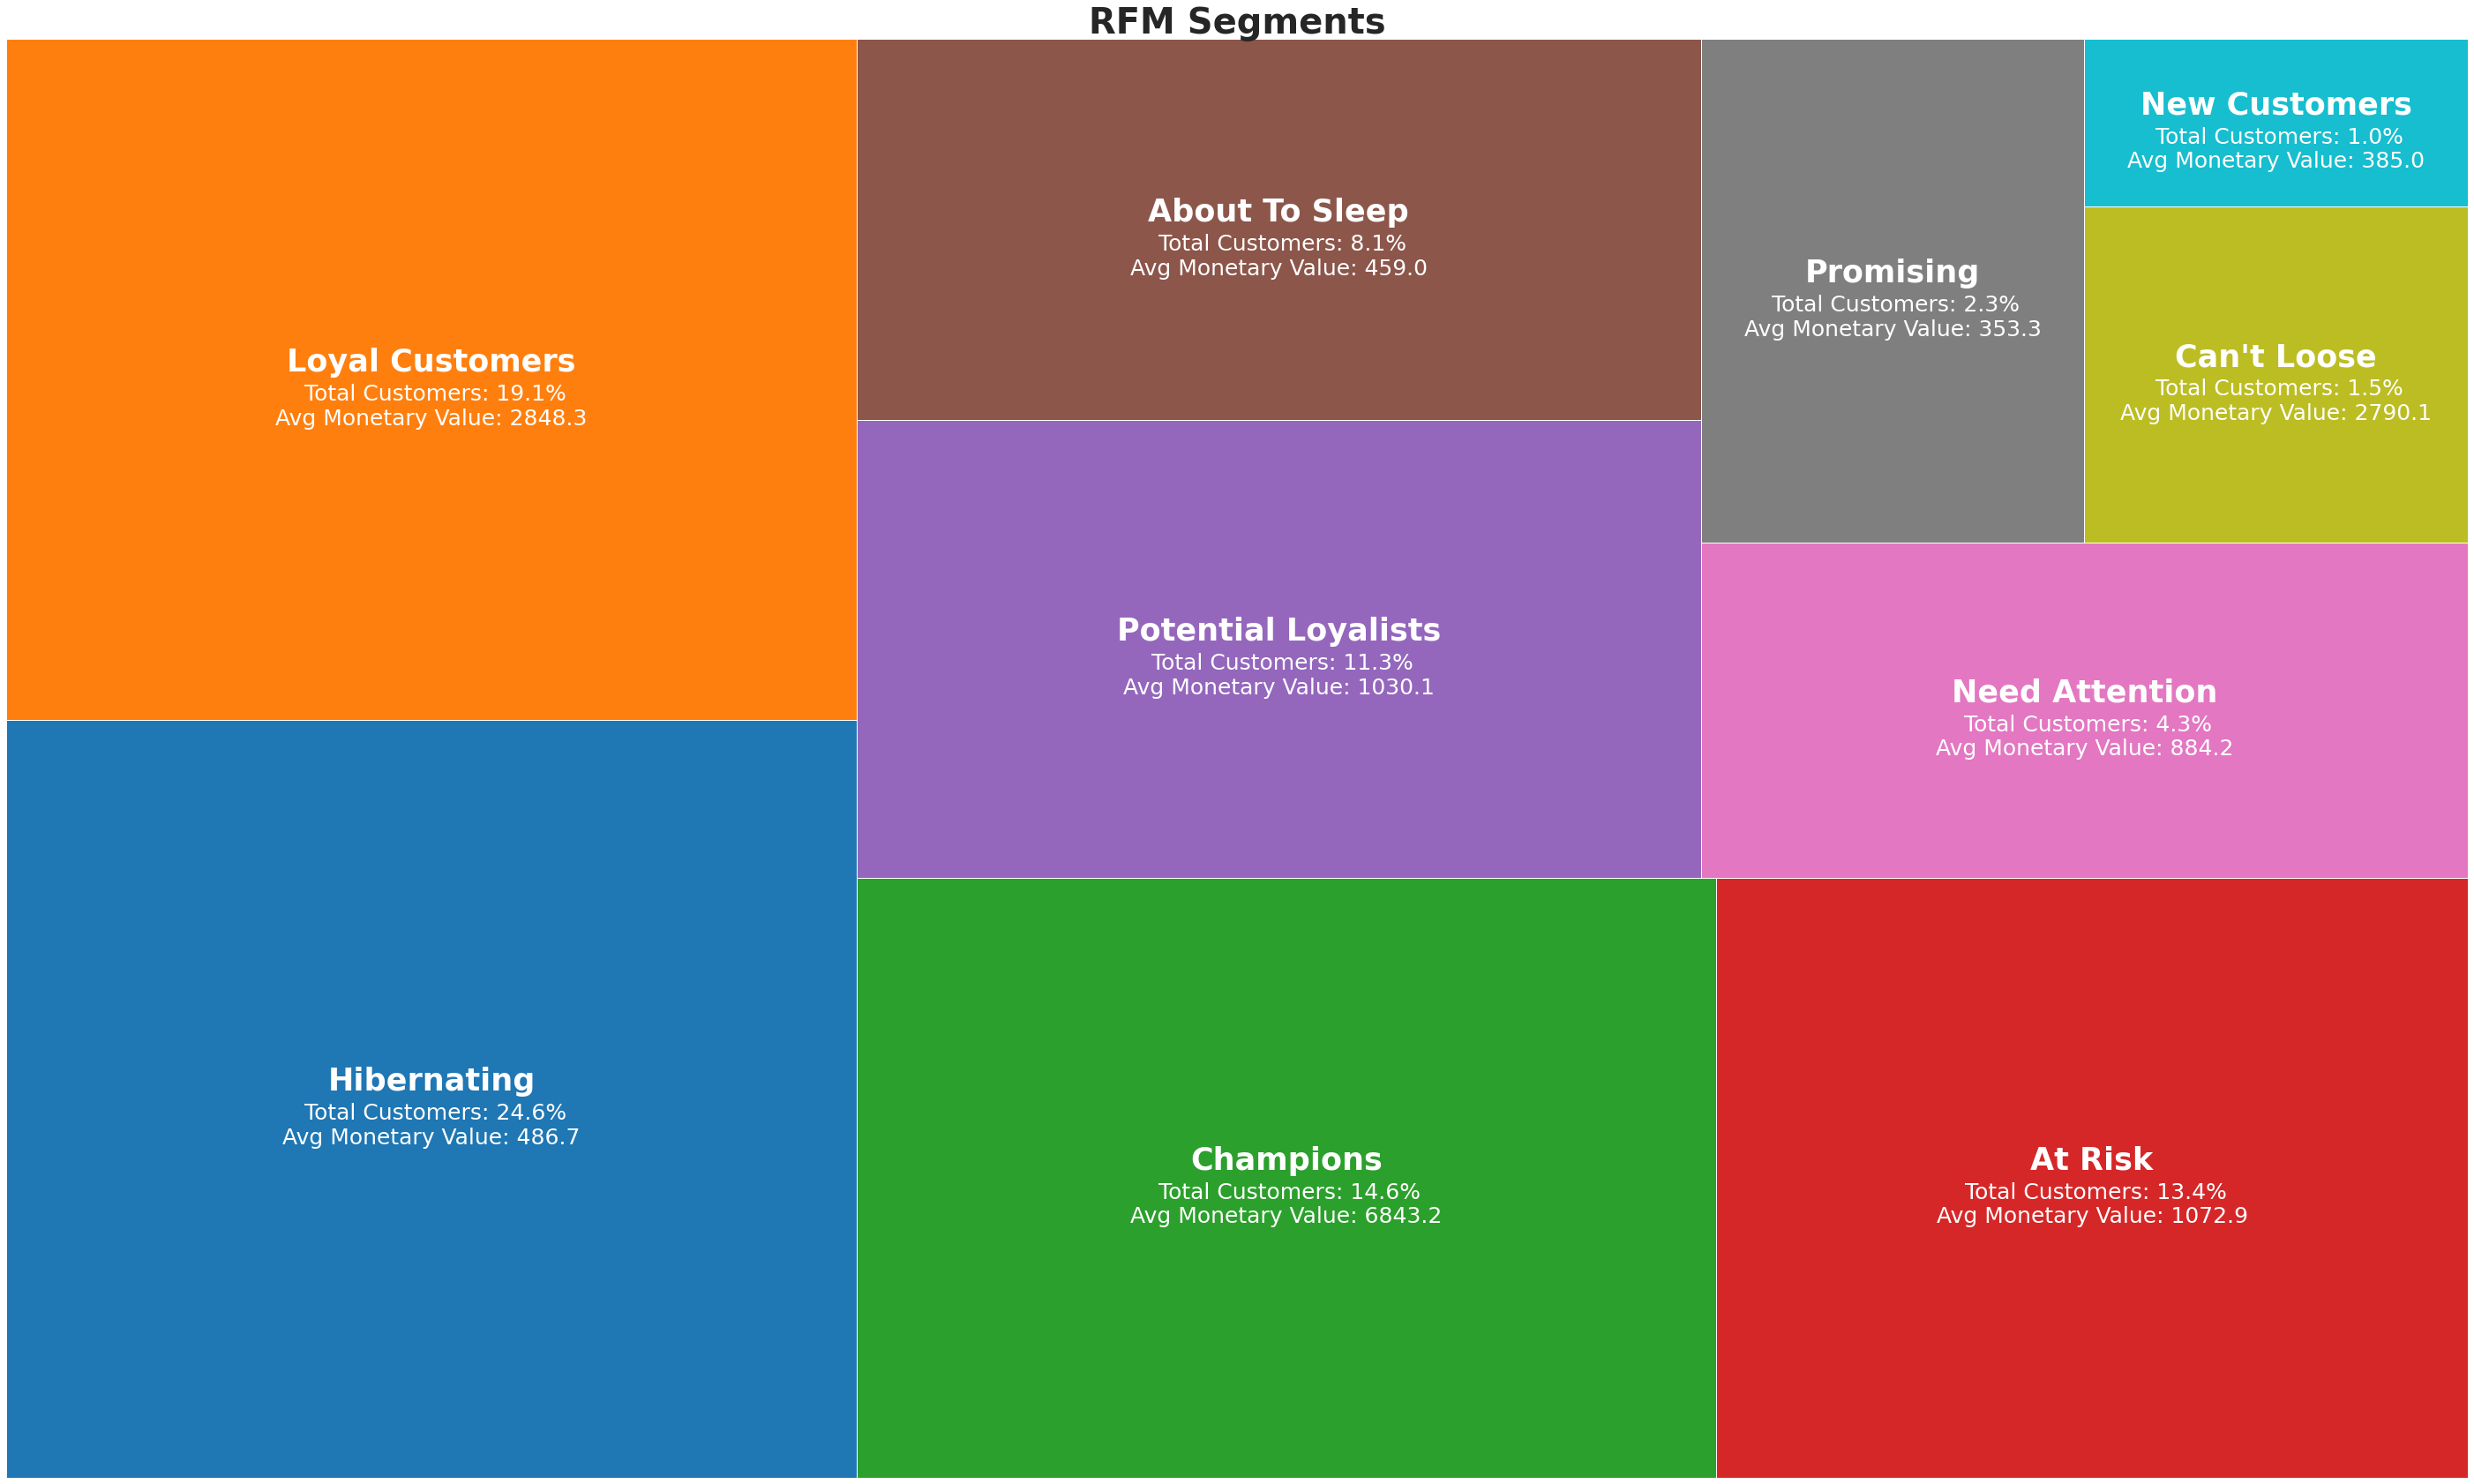

In [227]:
#Plotting graph

#Create our plot and resize it.
fig = plt.figure(figsize= (50,30))
palette = sns.color_palette("tab10")
ax = squarify.plot(norm_x = 70,norm_y = 50,sizes=rfm_stats['Count'].rank(pct = 'True'), 
              label=labels,color = palette,text_kwargs={'fontsize':35,'color':'white'} )
for i in range(len(labels)):
    text_parts = ax.texts[i].get_text().split("\n")

    ax.texts[i].set_text(text_parts[0] + "\n")
    ax.texts[i].set_weight('bold')
    x, y = ax.texts[i].get_position()
    new_text = ax.text(x, y-0.5, "\n " + text_parts[1] + "\n" + text_parts[2], ha=ax.texts[i].get_ha(), va=ax.texts[i].get_va())
    new_text.set_color('white')
    new_text.set_size(25)
ax.set_title("RFM Segments",fontsize=40,fontweight="bold")
plt.axis('off')
plt.show()

In [228]:
#Analysis of segments
rfm[['Recency','Monetary','Frequency','Segment']].groupby('Segment').agg({'mean','std','max','min'})

Recency                              Monetary  \
                        max        mean min        std        max   
Segment                                                             
About To Sleep           72   53.504274  34  10.877729    3528.34   
At Risk                 373  155.062069  73  68.287917   44534.30   
Can't Loose             372  132.428571  73  65.175870   10254.18   
Champions                13    5.876777   1   3.696643  280206.02   
Hibernating             374  217.897653  73  91.657666   77183.60   
Loyal Customers          72   33.469166  14  15.954610  124914.53   
Need Attention           72   53.064516  34  11.576590   12601.83   
New Customers            12    6.857143   1   3.886006    3861.00   
Potential Loyalists      33   17.123984   1   9.484625  168472.50   
Promising                33   23.444444  14   5.470183    6207.67   

                                                       Frequency             \
                            mean     min           std       max       mean   
Segment                                                                       
About To Sleep        458.997464    6.20    444.542813         2   1.162393   
At Risk              1072.889864   52.00   2576.621037         6   2.863793   
Can't Loose          2790.101429   70.02   2092.026277        34   8.380952   
Champions            6843.160521  201.12  20332.601117       209  12.413902   
Hibernating           486.687467    3.75   2425.990586         2   1.101408   
Loyal Customers      2848.333363   36.56   5977.180163        63   6.458283   
Need Attention        884.239516    6.90   1098.809282         3   2.327957   
New Customers         385.022381   89.94    570.957168         1   1.000000   
Potential Loyalists  1030.109004   20.80   7594.328625         3   2.010163   
Promising             353.340404   30.00    639.665811         1   1.000000   

                                    
                    min        std  
Segment                             
About To Sleep        1   0.369338  
At Risk               2   0.942418  
Can't Loose           6   4.289630  
Champions             3  16.451672  
Hibernating           1   0.302011  
Loyal Customers       3   4.529338  
Need Attention        2   0.470736  
New Customers         1   0.000000  
Potential Loyalists   1   0.649219  
Promising             1   0.000000

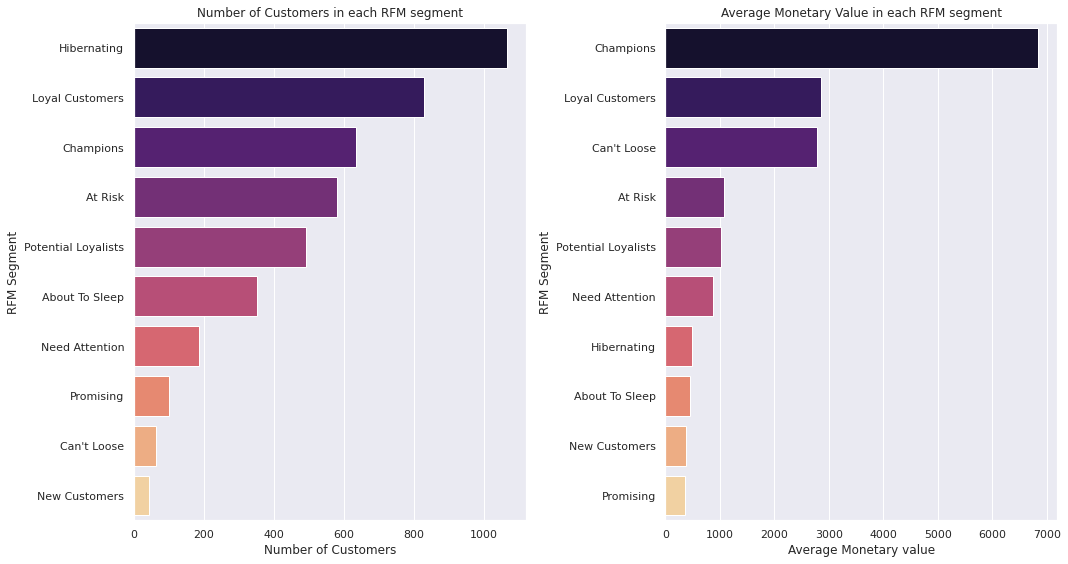

In [229]:
fig, ax = plt.subplots(1,2,figsize = (15,8))

sns.barplot(y = rfm_stats.index,
              x = rfm_stats.Count, orient = "h", 
            ax = ax[0], palette = 'magma')
ax[0].set_title("Number of Customers in each RFM segment")
ax[0].set_ylabel("RFM Segment")
ax[0].set_xlabel("Number of Customers")

sns.barplot(y = rfm_stats.index,
              x = rfm_stats.Monetary_Mean, orient = "h", 
            ax = ax[1], palette = 'magma',order = rfm_stats.sort_values('Monetary_Mean',ascending = False).index)
ax[1].set_title("Average Monetary Value in each RFM segment")
ax[1].set_ylabel("RFM Segment")
ax[1].set_xlabel("Average Monetary value")
fig.tight_layout()
plt.show()

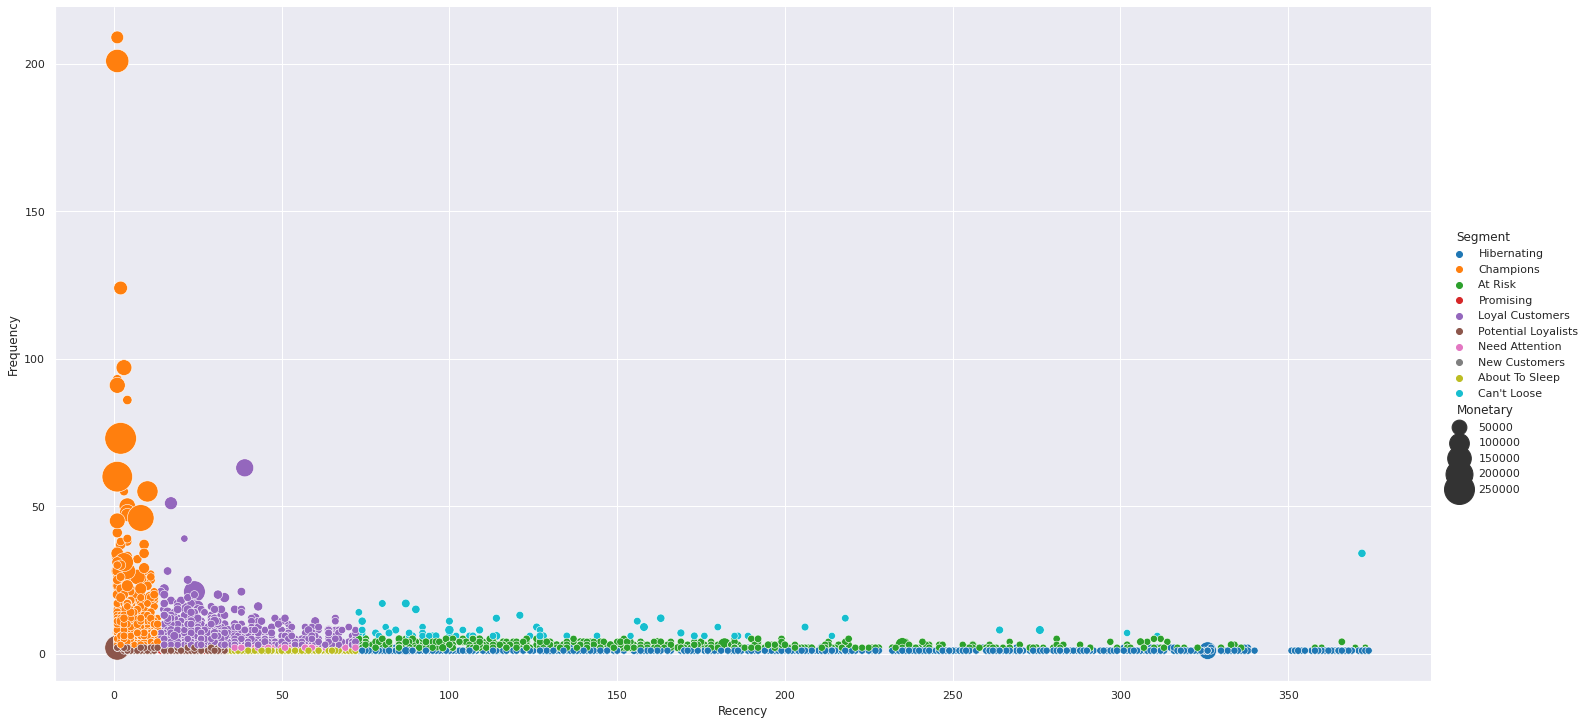

In [230]:
sns.relplot(x = "Recency", y = "Frequency", hue = "Segment", size = "Monetary", data = rfm, palette = palette,
            height = 10, aspect = 2, sizes = (50, 1000))

plt.show()

# **6.Cohort Analysis**

Cohort analysis is used to track groups of users over time, to identify some common patterns or behaviors. Our objective is to find the percentage of active customers compared to the total number of customers after each month and interpreting the retention rate.

In [231]:

n_orders = df.groupby(['CustomerID'])['InvoiceNo'].value_counts()
mult_orders_perc = np.sum(n_orders > 1) / df['CustomerID'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once.')

395.04% of customers ordered more than once.


**Comments**: <br>
We can observe that 65.58% of customers ordered more than once. This is already a valuable piece of information, as is seems that the customers are placing multiple orders. This means that there will be at least some retention. 

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


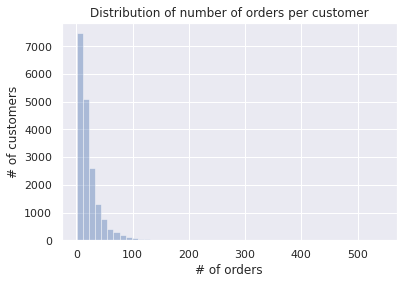

In [232]:
ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Distribution of number of orders per customer',
       xlabel='# of orders', 
       ylabel='# of customers');

**Comments**: <br> Some customers order more than 50 times.

#### Step 1: Assigning the cohort and calculating the monthly offset 
In this step we specifically deal with two new fields 'InvoiceMonth' and 'CohortMonth'. The former indicates the truncated month of the purchase date and the latter indicates the monthly cohort based on the first purchase date calculated per customer. 

In [233]:
df_c = df[['CustomerID','InvoiceNo','InvoiceDate','MonthYear','TotalPrice']].copy() #keeping relevant columns only
df_c = df_c.rename(columns = {'MonthYear': 'InvoiceMonth'})
df_c['CohortMonth'] = df_c.groupby("CustomerID")["InvoiceMonth"].transform("min")

In [234]:
df_c.sample(1000).head(5)

,CustomerID,InvoiceNo,InvoiceDate,InvoiceMonth,TotalPrice,CohortMonth
429702,14096,573576,2011-10-31 14:09:00,2011-10,4.92,2011-08
192715,18102,553470,2011-05-17 11:27:00,2011-05,576.30,2010-12
91524,14530,544106,2011-02-16 10:47:00,2011-02,7.95,2011-02
303168,17975,563522,2011-08-17 10:59:00,2011-08,1.16,2010-12
418569,18079,572732,2011-10-25 15:21:00,2011-10,20.40,2011-04


#### Step 2: Calculating time offset in Month as Cohort Index
In this step we aggregate the data per CohortMonth and InvoiceMonth and count the number of unique customers in each group. Additionally, calculate CohortIndex, which indicates the number of periods between the cohort month and the month of the purchase. 

In [235]:

df_cohort = df_c.groupby(['CohortMonth', 'InvoiceMonth']) \
              .agg(CustomerCount=('CustomerID', 'nunique')) \
              .reset_index(drop=False)
df_c['CohortIndex'] = (df_c.InvoiceMonth - df_c.CohortMonth).apply(attrgetter('n')) # n gives the number of time periods the offset represents.
df_cohort['CohortIndex'] = (df_cohort.InvoiceMonth - df_cohort.CohortMonth).apply(attrgetter('n'))# n gives the number of time periods the offset represents.

In [236]:
df_cohort

,CohortMonth,InvoiceMonth,CustomerCount,CohortIndex
0,2010-12,2010-12,885,0
1,2010-12,2011-01,324,1
2,2010-12,2011-02,286,2
3,2010-12,2011-03,340,3
4,2010-12,2011-04,321,4
...,...,...,...,...
86,2011-10,2011-11,86,1
87,2011-10,2011-12,41,2
88,2011-11,2011-11,323,0
89,2011-11,2011-12,36,1


In [237]:
df_c

,CustomerID,InvoiceNo,InvoiceDate,InvoiceMonth,TotalPrice,CohortMonth,CohortIndex
0,17850,536365,2010-12-01 08:26:00,2010-12,15.30,2010-12,0
1,17850,536365,2010-12-01 08:26:00,2010-12,20.34,2010-12,0
2,17850,536365,2010-12-01 08:26:00,2010-12,22.00,2010-12,0
3,17850,536365,2010-12-01 08:26:00,2010-12,20.34,2010-12,0
4,17850,536365,2010-12-01 08:26:00,2010-12,20.34,2010-12,0
...,...,...,...,...,...,...,...
541904,12680,581587,2011-12-09 12:50:00,2011-12,10.20,2011-08,4
541905,12680,581587,2011-12-09 12:50:00,2011-12,12.60,2011-08,4
541906,12680,581587,2011-12-09 12:50:00,2011-12,16.60,2011-08,4
541907,12680,581587,2011-12-09 12:50:00,2011-12,16.60,2011-08,4


#### Step 3: Creating the cohort table
In this step we pivot the df_cohort in a way that each row contains information about a given cohort and each column contains values for a certain period. 

In [238]:
cohort_table = df_cohort.pivot_table(index = 'CohortMonth',
                                     columns = 'CohortIndex',
                                     values = 'CustomerCount')
cohort_table.fillna(0,inplace = True)

In [239]:
cohort_table

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,0.0
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,0.0,0.0
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,0.0,0.0,0.0
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,0.0,0.0,0.0,0.0
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,0.0,0.0,0.0,0.0,0.0
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-08,169.0,35.0,42.0,41.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Comments:** <br>
Above data is our cohort table. Its interpretation is simple. For example, We have 885 unique customer with their first transaction is in 2010-12. Its cohort month is 2010-12 and cohort index is 0. Go on the one right cell, it is 324. Its mean, 324 unique customer retain their customership for next month.

#### Step 4: Creating the retention matrix

The percentage of active customers compared to the total number of customers after a specific time interval is called retention rate.
In this step we will calculate the retention count for each cohort Month paired with cohort Index. We need to divide the values of each row by the row's first value, which is actually the cohort size — all customers who made their first purchase in the given month.

In [240]:
cohort_sizes = cohort_table[0].reset_index().rename(columns={0:'cohort_size'})
retention_table = cohort_table.divide(cohort_table[0], axis=0)
retention_table
# Converting the retention rate into percentage and Rounding off.

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,0.000000
2011-02,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,0.000000,0.000000
2011-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,0.000000,0.000000,0.000000
2011-04,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,0.000000,0.000000,0.000000,0.000000
2011-05,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,0.000000,0.000000,0.000000,0.000000,0.000000
2011-06,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-08,1.0,0.207101,0.248521,0.242604,0.124260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [241]:
cohort_sizes

,CohortMonth,cohort_size
0,2010-12,885.0
1,2011-01,417.0
2,2011-02,380.0
3,2011-03,452.0
4,2011-04,300.0
5,2011-05,284.0
6,2011-06,242.0
7,2011-07,188.0
8,2011-08,169.0
9,2011-09,299.0


In [242]:
def plot_heatmap(cohort_sizes, matrix, title, x_title, y_title, if_annot = True):
  
  with sns.axes_style("white"):
      fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10), gridspec_kw={'width_ratios': [2, 11]})

      Cohorts = sns.barplot(y = 'CohortMonth', x = 'cohort_size',hue = 'cohort_size',data= cohort_sizes,dodge = False, palette="Purples",ax = ax1)
      Cohorts.yaxis.get_label().set_visible(False)
      Cohorts.set(yticklabels=[])
      Cohorts.set(yticks=[])
      vals = Cohorts.get_xticks()
      ax1.legend('',frameon=False)

      Heatmap = sns.heatmap(matrix, cmap="Purples", annot=if_annot, fmt='.2%', ax = ax2)
      Heatmap.set(xlabel=x_title, ylabel=y_title)

      plt.title(title)

      plt.tight_layout()


      fig.show()

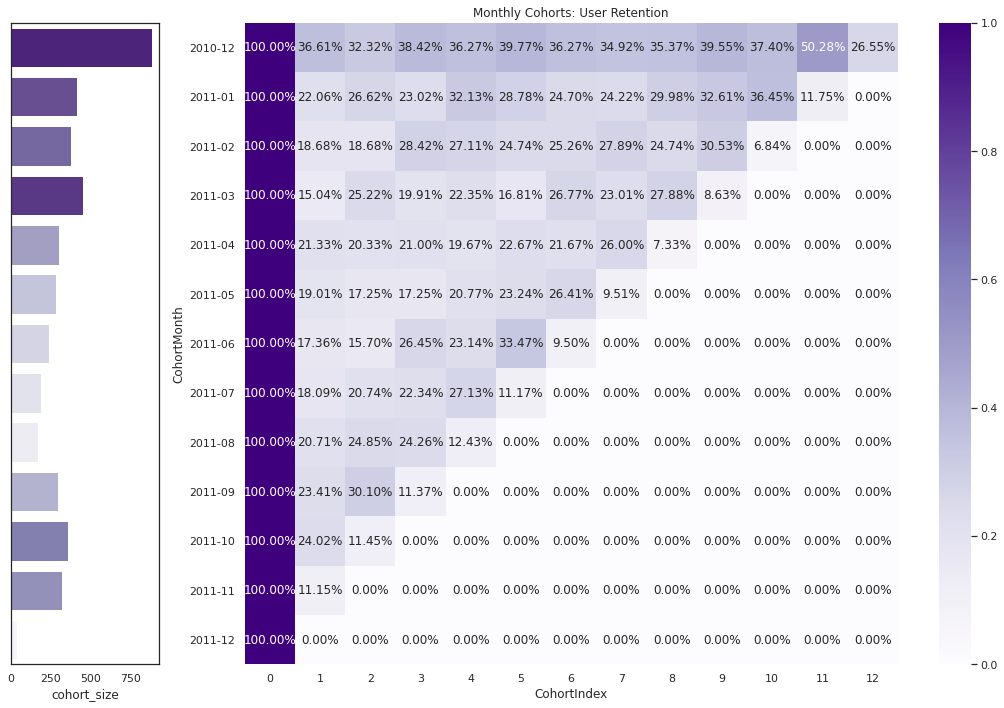

In [243]:
plot_heatmap(cohort_sizes,retention_table,'Monthly Cohorts: User Retention','CohortIndex','CohortMonth',if_annot = True)

**Comments:** <br>
Here, We have 13 cohorts and 13 cohort indexes. The darker the shades higher the values. Thus, if we see in 2010-12 cohort Month in 12th Cohort Index, we see the dark blue shade with 50.28% which means that 50.28% of cohorts that signed in December 2010 were active 12 months later.


In [244]:
df_cohort.head()

,CohortMonth,InvoiceMonth,CustomerCount,CohortIndex
0,2010-12,2010-12,885,0
1,2010-12,2011-01,324,1
2,2010-12,2011-02,286,2
3,2010-12,2011-03,340,3
4,2010-12,2011-04,321,4


In [245]:
customer_in_month = df_c.groupby("CohortIndex")["CustomerID"].nunique()
customer_in_month

CohortIndex
0     4338
1      976
2      942
3      927
4      905
5      878
6      804
7      725
8      680
9      641
10     509
11     494
12     235
Name: CustomerID, dtype: int64

In [246]:
customers_per_month = df_c.groupby("CohortMonth")["CustomerID"].nunique()
customers = customers_per_month.cumsum()
customers = customers[::-1]
customers

CohortMonth
2011-12    4338
2011-11    4297
2011-10    3974
2011-09    3616
2011-08    3317
2011-07    3148
2011-06    2960
2011-05    2718
2011-04    2434
2011-03    2134
2011-02    1682
2011-01    1302
2010-12     885
Freq: M, Name: CustomerID, dtype: int64

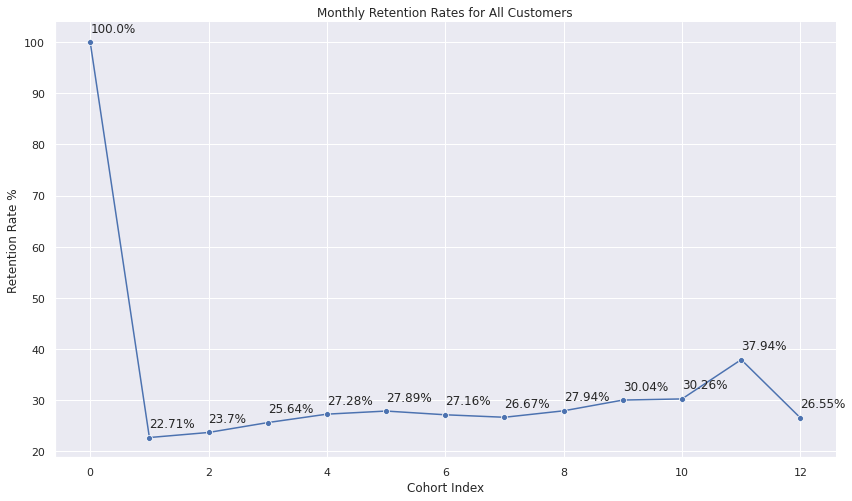

In [247]:
fig, ax = plt.subplots(figsize = (14, 8))
x = customer_in_month.index
y = 100*(customer_in_month.values / customers.values)

sns.lineplot(x = x, y = y, marker = "o")

for x1, y1 in zip(x, y):
    plt.text(x1, y1 + 2, s = str(round(y1, 2)) + "%")

plt.xlabel("Cohort Index")
plt.ylabel("Retention Rate %")
plt.title("Monthly Retention Rates for All Customers")
sns.despine()
plt.show()

In [248]:
y

array([100.        ,  22.71352106,  23.7040765 ,  25.63606195,
        27.28369008,  27.89072427,  27.16216216,  26.67402502,
        27.93755136,  30.03748828,  30.26159334,  37.94162826,
        26.55367232])

In [249]:
df_month = df_c.groupby("InvoiceMonth").agg({"TotalPrice": "sum",
                                                            "CustomerID": "nunique"})
df_month = df_month.reset_index(drop = False)
df_month

,InvoiceMonth,TotalPrice,CustomerID
0,2010-12,570422.730,885
1,2011-01,568101.310,741
2,2011-02,446084.920,758
3,2011-03,594081.760,974
4,2011-04,468374.331,856
5,2011-05,677355.150,1056
6,2011-06,660046.050,991
7,2011-07,598962.901,949
8,2011-08,644051.040,935
9,2011-09,950690.202,1266


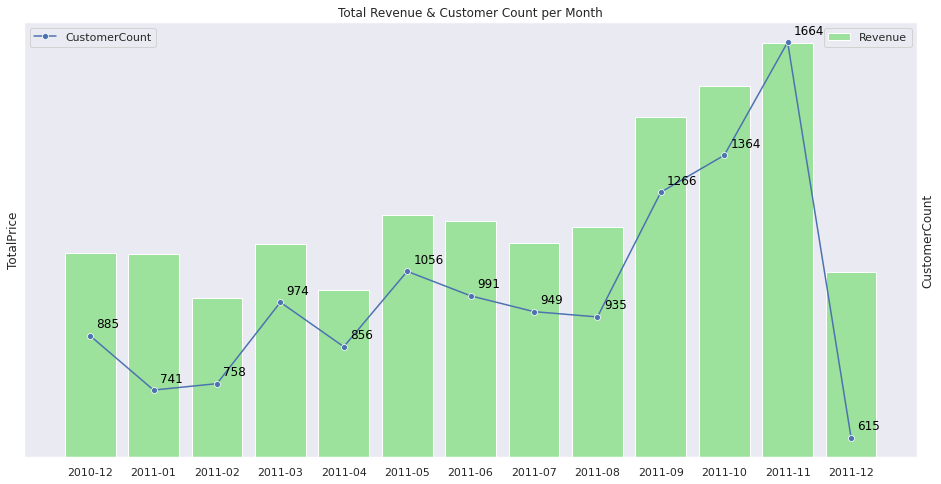

In [250]:
fig, ax = plt.subplots(figsize = (16, 8))
sns.barplot(x = np.arange(len(df_month)), y = df_month['TotalPrice'], ax = ax,color = 'lightgreen',label = 'Revenue')
ax2 = ax.twinx()
sns.lineplot(x = np.arange(len(df_month)), y = df_month['CustomerID'], ax = ax2, marker = "o",label = 'CustomerCount')
ax.set_yticks([])
ax2.set_yticks([])
ax2.set_ylabel("CustomerCount")
ax.set_ylabel("TotalPrice")
plt.title("Total Revenue & Customer Count per Month")
for x, y in zip(np.arange(len(df_month.index)),  df_month.CustomerID):
    ax2.text(x + 0.1, y + 22 , y, color = "black")
plt.xticks(ticks = np.arange(len(df_month)), labels = df_month['InvoiceMonth'])
ax.legend()
plt.show()


# Customer Value Analysis

In [251]:
df_zero = pd.DataFrame(np.zeros((cohort_table.shape[0]
                       , cohort_table.shape[1])),index = cohort_table.index)

In [252]:
"""
Marginal retention matrix is calculated for all the columns except first
by division of a column that corresponds to t+1 maturity by t
In other words, it tells us how many customers who reached maturity t moved to t+1
"""

marginal = df_zero.copy()
# dividing each column (except ind = 0) by the previous one
for i in retention_table.columns.values:
  if i == 0:
    marginal.iloc[:, i] = cohort_table[i].divide(cohort_table[i], axis=0)
  else:
    marginal.iloc[:, i] = cohort_table[i].divide(cohort_table[i-1], axis=0)

marginal

,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.882716,1.188811,0.944118,1.096573,0.911932,0.962617,1.012945,1.118211,0.945714,1.344411,0.52809
2011-01,1.0,0.220624,1.206522,0.864865,1.395833,0.895522,0.858333,0.980583,1.237624,1.088000,1.117647,0.322368,0.00000
2011-02,1.0,0.186842,1.000000,1.521127,0.953704,0.912621,1.021277,1.104167,0.886792,1.234043,0.224138,0.000000,NaN
2011-03,1.0,0.150442,1.676471,0.789474,1.122222,0.752475,1.592105,0.859504,1.211538,0.309524,0.000000,NaN,NaN
2011-04,1.0,0.213333,0.953125,1.032787,0.936508,1.152542,0.955882,1.200000,0.282051,0.000000,NaN,NaN,NaN
2011-05,1.0,0.190141,0.907407,1.000000,1.204082,1.118644,1.136364,0.360000,0.000000,NaN,NaN,NaN,NaN
2011-06,1.0,0.173554,0.904762,1.684211,0.875000,1.446429,0.283951,0.000000,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.180851,1.147059,1.076923,1.214286,0.411765,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.207101,1.200000,0.976190,0.512195,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [253]:
"""
Marginal retention by taking an average of the previous N rows
Here is where you would like to consider seasonality.

Notice that using mean() function can be not always desirable.
This is due to a reason that some values in previous rows might contain 0's. 
We want to average non-zero values in the previous N rows.
Including zeros will significantly affect the resulting retention matrix.
"""
N = 3 # periods to be averaged
marginal_e = marginal.copy()
for row_n in range(marginal.shape[0])[1:]:
    row = marginal_e.iloc[row_n, :]
    mask = (row.isna()) | (row == 0) #missing values to be filled
    indx = np.where(mask)[0] #indices of missing values in a row
    if row_n <= N:
      marginal_e.iloc[row_n, indx] = np.sum(marginal_e.iloc[:row_n, indx], axis = 0) / np.count_nonzero(marginal_e.iloc[:row_n, indx], axis = 0)
    else:
      marginal_e.iloc[row_n, indx] = np.sum(marginal_e.iloc[row_n - N:row_n, indx], axis = 0) / np.count_nonzero(marginal_e.iloc[row_n - N:row_n, indx], axis = 0)
marginal_e

,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.882716,1.188811,0.944118,1.096573,0.911932,0.962617,1.012945,1.118211,0.945714,1.344411,0.52809
2011-01,1.0,0.220624,1.206522,0.864865,1.395833,0.895522,0.858333,0.980583,1.237624,1.088000,1.117647,0.322368,0.52809
2011-02,1.0,0.186842,1.000000,1.521127,0.953704,0.912621,1.021277,1.104167,0.886792,1.234043,0.224138,0.833390,0.52809
2011-03,1.0,0.150442,1.676471,0.789474,1.122222,0.752475,1.592105,0.859504,1.211538,0.309524,0.762500,0.833390,0.52809
2011-04,1.0,0.213333,0.953125,1.032787,0.936508,1.152542,0.955882,1.200000,0.282051,0.877189,0.701428,0.663049,0.52809
2011-05,1.0,0.190141,0.907407,1.000000,1.204082,1.118644,1.136364,0.360000,0.793461,0.806918,0.562689,0.776610,0.52809
2011-06,1.0,0.173554,0.904762,1.684211,0.875000,1.446429,0.283951,0.806501,0.762350,0.664544,0.675539,0.757683,0.52809
2011-07,1.0,0.180851,1.147059,1.076923,1.214286,0.411765,0.792066,0.788834,0.612621,0.782884,0.646552,0.732447,0.52809
2011-08,1.0,0.207101,1.200000,0.976190,0.512195,0.992279,0.737460,0.651778,0.722811,0.751449,0.628260,0.755580,0.52809


In [254]:
retention_table_e = retention_table.copy()
columns = retention_table_e.columns.values #assuming those are integers ????? - rethink
"""
Here we extrapolate Cohort Retention Table
We do this by mulitplying i'th columns in marginal retention matrix by (i-1)th column in cohort retention matrix.
We only do it for 0 and NA values
"""
for column in columns[1:]:
  row_indx = np.where((retention_table_e.loc[:, column].isna()) | (retention_table_e.loc[:, column] == 0))[0]
  retention_table_e.iloc[row_indx, column] = retention_table_e.iloc[row_indx, column - 1] * marginal_e.iloc[row_indx, column]

retention_table_e

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,0.062054
2011-02,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,0.057021,0.030112
2011-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,0.065791,0.054829,0.028955
2011-04,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,0.064327,0.045121,0.029917,0.015799
2011-05,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,0.075435,0.060870,0.034251,0.026599,0.014047
2011-06,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,0.076651,0.058435,0.038833,0.026233,0.019876,0.010496
2011-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,0.088475,0.069792,0.042756,0.033473,0.021642,0.015852,0.008371
2011-08,1.0,0.207101,0.248521,0.242604,0.124260,0.123301,0.090930,0.059266,0.042838,0.032191,0.020224,0.015281,0.008070


In [255]:
lt_df = retention_table_e.sum(axis = 1).reset_index().rename(columns={0:'lifetime'})
value_df = df_c[['CohortMonth', 'TotalPrice']].groupby('CohortMonth').mean().rename(columns = {'TotalPrice':'value'}).reset_index()

In [256]:
lt_df

,CohortMonth,lifetime
0,2010-12,5.437288
1,2011-01,3.985315
2,2011-02,3.416081
3,2011-03,3.005770
4,2011-04,2.755165
5,2011-05,2.545708
6,2011-06,2.486722
7,2011-07,2.275043
8,2011-08,2.214585
9,2011-09,2.021899


In [257]:
ltv_df = lt_df.merge(value_df)
ltv_df = ltv_df.assign(ltv = ltv_df.lifetime * ltv_df.value)
ltv_df

,CohortMonth,lifetime,value,ltv
0,2010-12,5.437288,26.924445,146.395965
1,2011-01,3.985315,23.819722,94.929099
2,2011-02,3.416081,19.647827,67.118571
3,2011-03,3.005770,18.912104,56.845432
4,2011-04,2.755165,17.120784,47.170576
5,2011-05,2.545708,29.383445,74.801676
6,2011-06,2.486722,19.937111,49.578056
7,2011-07,2.275043,13.865318,31.544197
8,2011-08,2.214585,15.128701,33.503790
9,2011-09,2.021899,16.579982,33.523044


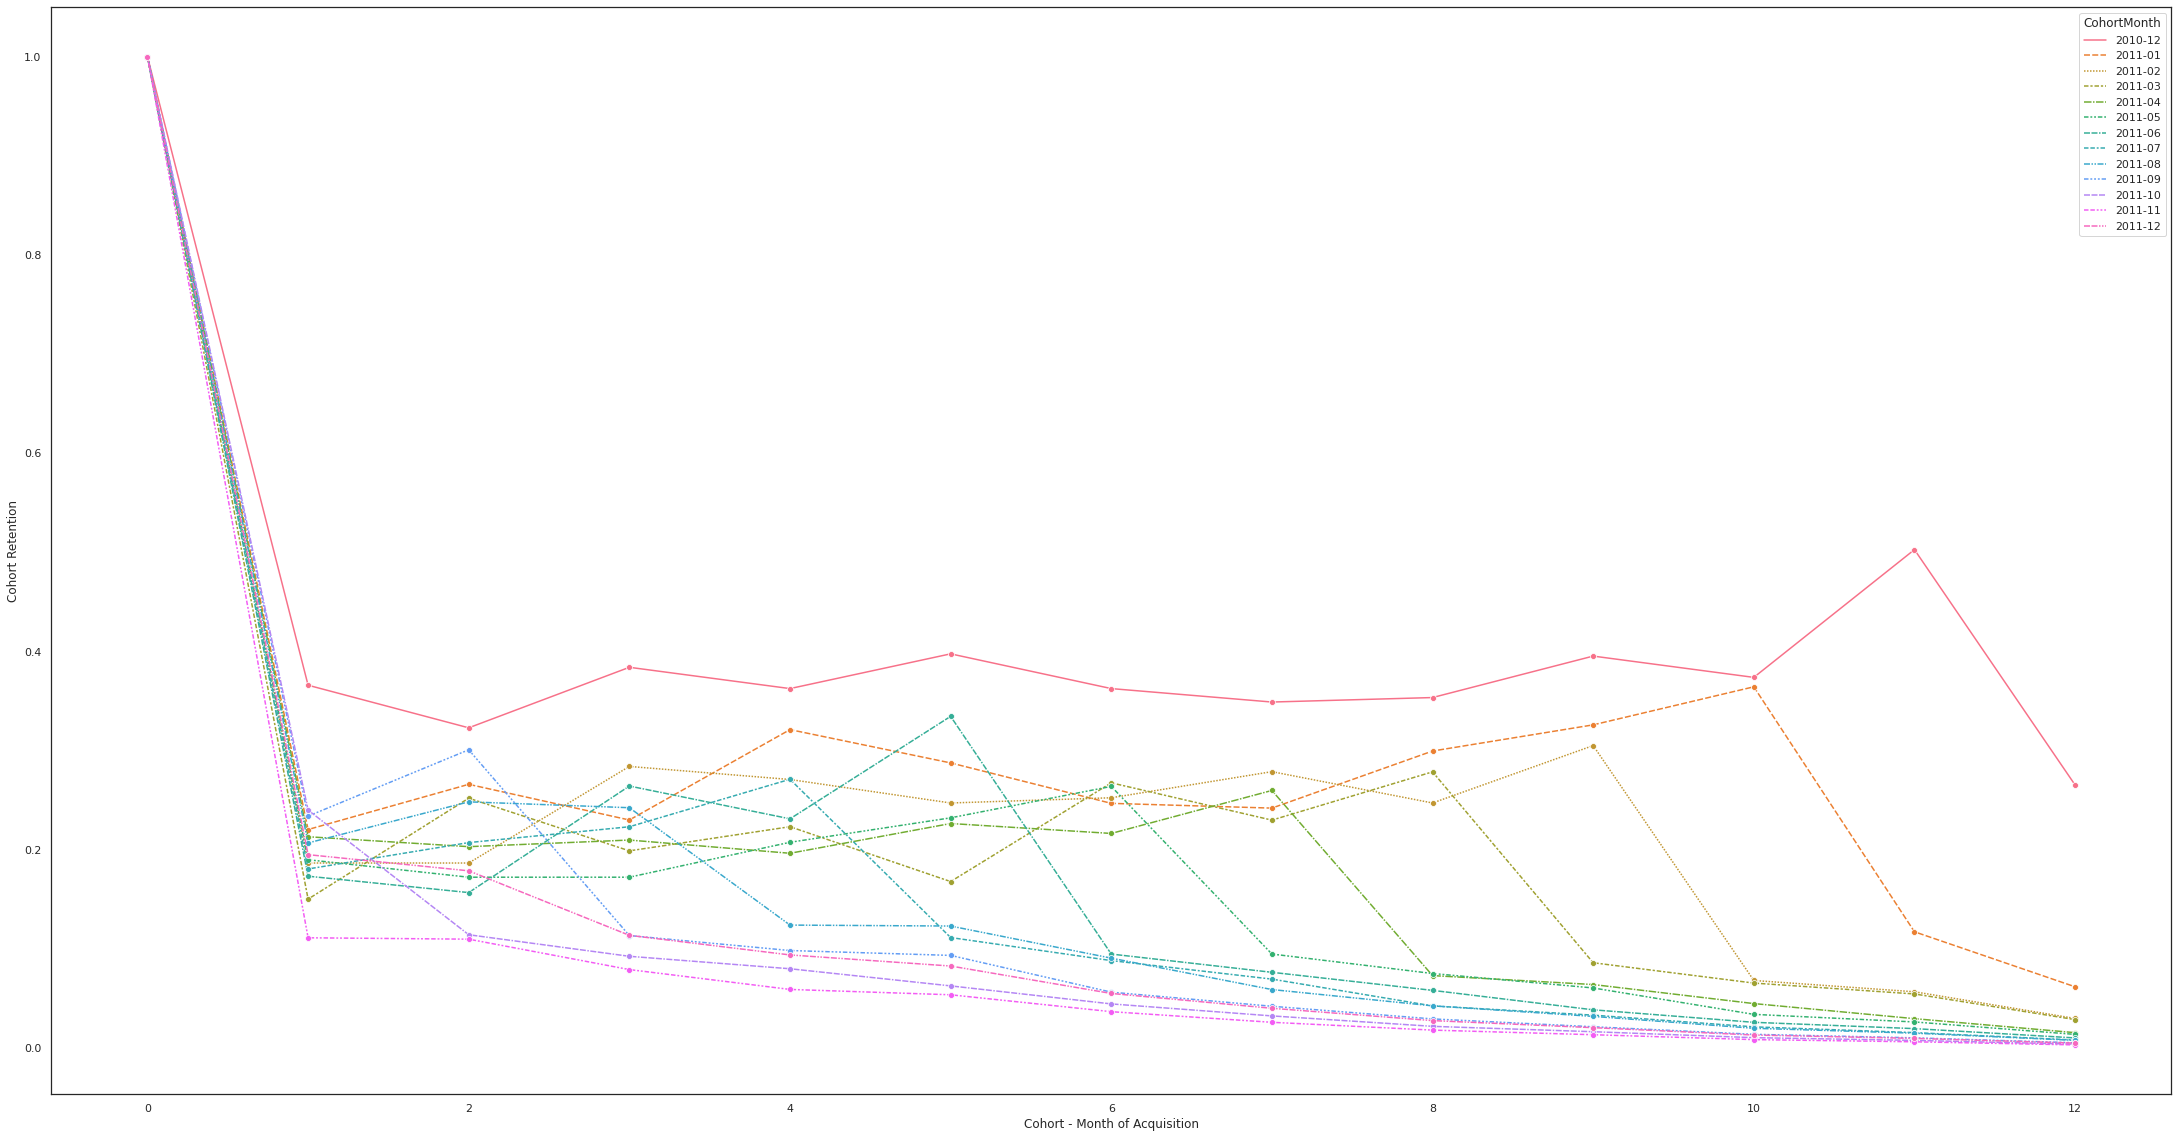

In [258]:
plt.figure(figsize=(38,20))
with sns.axes_style("white"):
    ax = sns.lineplot(data = retention_table_e.transpose(), legend = True, marker="o")
    ax.set_ylabel("Cohort Retention")
    ax.set_xlabel("Cohort - Month of Acquisition")
    plt.show()

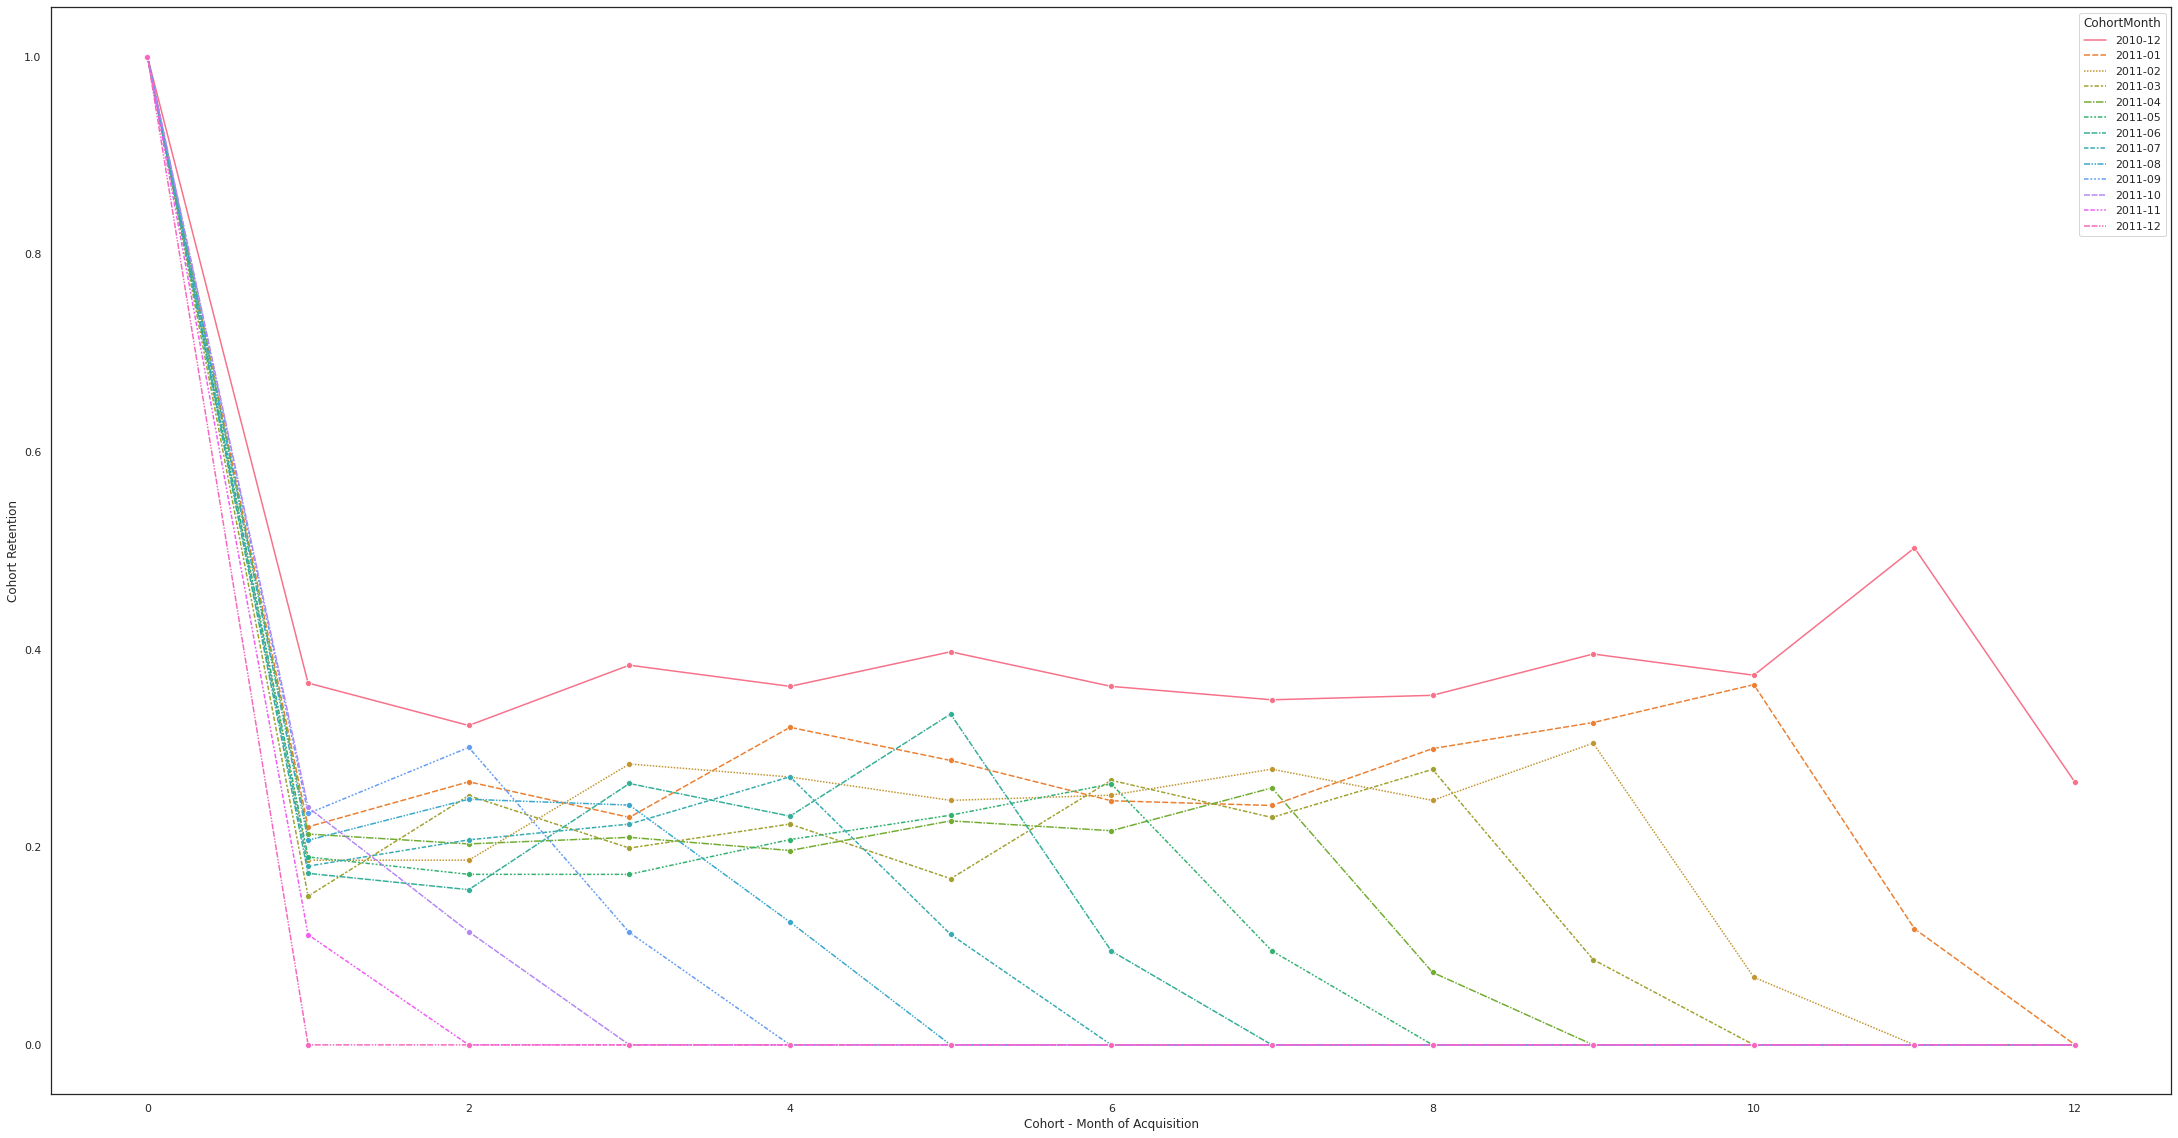

In [259]:
plt.figure(figsize=(38,20))
with sns.axes_style("white"):
    ax = sns.lineplot(data = retention_table.transpose(), legend = True, marker="o")
    ax.set_ylabel("Cohort Retention")
    ax.set_xlabel("Cohort - Month of Acquisition")
    plt.show()

https://towardsdatascience.com/customer-lifetime-value-via-retention-in-python-with-pandas-and-numpy-143171cc98bc
https://www.analyticsvidhya.com/blog/2020/10/a-definitive-guide-for-predicting-customer-lifetime-value-clv/